<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>

* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [3]:
data = pd.read_csv('training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4

<p>
    training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [4]:
# note the seprator in this file
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1, na_values = "null")
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


ID                                               TEXT
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...

In [5]:
# Understand text data and create some features out of it
data_text["TEXT"][0]

"Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK1

Its very long medical text corpus hard to find the insight but let's try, At first glance found that multi space between two sentences, special character like ),/-% etc we will remove it because they do not add any meaning and will convert all text into lowercase so that words will not discriminate when comparing. Looks like the respective genes and variations are present multiple time in text evidence. 

<h3>3.1.3. Preprocessing of text</h3>

In [6]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [7]:
#text processing stage.
start_time = time.process_time()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 13684.2021202 seconds


In [8]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  
0  cyclin dependent kinases cdks regulate variety...  
1  abstract background non small cell lung cancer...  
2  abstract background non small cell lung cancer...  
3  recent evidence demonstrated acquired uniparen...  
4  oncogenic mutations monomeric casitas b lineag...

In [9]:
# Was unable to detect the null values so convert them into nan using na_values = "null" in read_csv
result[~result["TEXT"].notnull()] 

ID    Gene             Variation  Class TEXT
1109  1109   FANCA                S1088F      1  NaN
1277  1277  ARID5B  Truncating Mutations      1  NaN
1407  1407   FGFR3                 K508M      6  NaN
1639  1639    FLT1         Amplification      6  NaN
2755  2755    BRAF                 G596C      7  NaN

In [10]:
#result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [11]:
#result = result[~result.isin(['null']).any(axis=1)]

In [12]:
result = result.dropna()
result.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  
0  cyclin dependent kinases cdks regulate variety...  
1  abstract background non small cell lung cancer...  
2  abstract background non small cell lung cancer...  
3  recent evidence demonstrated acquired uniparen...  
4  oncogenic mutations monomeric casitas b lineag...

#### Basic understanding of data

In [13]:
# Basic stats of Gene feature
# BRCA1 is the most occured Gene and frequency is 264
result["Gene"].describe()

count      3316
unique      262
top       BRCA1
freq        264
Name: Gene, dtype: object

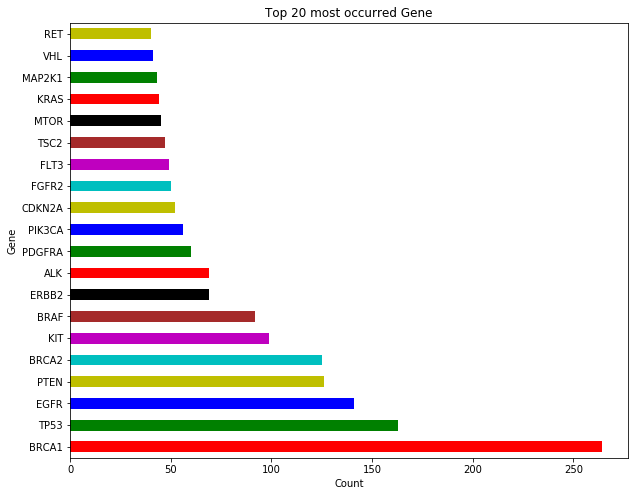

In [14]:
gen = result.groupby("Gene")["Class"].count()
sorted_gen = gen.sort_values(ascending = False)[0:20]
color = ["r", "g", "b", "y", "c", "m", "brown", "k"]
plt.figure(figsize = (10, 8))
sorted_gen.plot(kind = "barh", color = color) 
plt.title("Top 20 most occurred Gene")
plt.xlabel("Count")
plt.show()

- There are total 3316 Gene and only 262 are unique out of this means most of the gene occur multiple times.
- Most occured Gene BRCA1 and frequency is 264. Might be top 50 gene are dominating among the classes.

In [15]:
# Basic stats about variation features
result["Variation"].describe() 

count                     3316
unique                    2993
top       Truncating Mutations
freq                        92
Name: Variation, dtype: object

In [16]:
result.groupby("Class")["Gene"].count()

Class
1    566
2    452
3     89
4    686
5    242
6    273
7    952
8     19
9     37
Name: Gene, dtype: int64

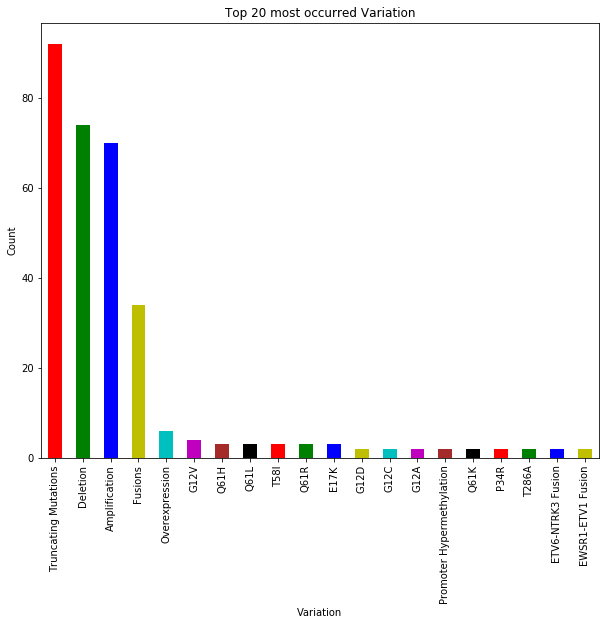

In [17]:
var = result.groupby("Variation")["Class"].count()
sorted_var = var.sort_values(ascending = False)[0:20]
plt.figure(figsize = (10, 8))
sorted_var.plot(kind = "bar", color = color)
plt.title("Top 20 most occurred Variation")
plt.ylabel("Count")
plt.show()

- Very few Variation occur multiple times and the most occured variation is "Truncating Mutations" and frequency is 92.
- For the same gene there are different - different variation means it is the most important feature.

In [18]:
result["TEXT"].describe()

count                                                  3316
unique                                                 1920
top       pten phosphatase tensin homolog phosphatase un...
freq                                                     53
Name: TEXT, dtype: object

In [19]:
# Check for duplications and keep the fist repeated Text 
result[result.duplicated(["TEXT"], keep = "first")][:20]

ID    Gene Variation  Class  \
2    2     CBL     Q249E      2   
5    5     CBL     V391I      4   
6    6     CBL     V430M      5   
10  10     CBL     P395A      4   
13  13     CBL     C381A      4   
14  14     CBL     P428L      5   
18  18     CBL     M374V      5   
19  19     CBL     Y371S      4   
21  21     CBL     C396R      4   
22  22     CBL     G375P      4   
23  23     CBL     S376F      4   
24  24     CBL     P417A      4   
25  25     CBL     H398Y      4   
29  29    TERT     H412Y      4   
30  30    TERT     H876Q      4   
32  32    TERT     P704S      4   
36  36  DICER1    G1809K      4   
38  38  DICER1    D1709A      1   
40  40  DICER1    D1810A      4   
42  42  DICER1    E1705K      4   

                                                 TEXT  
2   abstract background non small cell lung cancer...  
5   oncogenic mutations monomeric casitas b lineag...  
6   oncogenic mutations monomeric casitas b lineag...  
10  oncogenic mutations monomeric casitas b lineag...  
13  noonan syndrome autosomal dominant congenital ...  
14  oncogenic mutations monomeric casitas b lineag...  
18  oncogenic mutations monomeric casitas b lineag...  
19  acquired uniparental disomy aupd common featur...  
21  oncogenic mutations monomeric casitas b lineag...  
22  oncogenic mutations monomeric casitas b lineag...  
23  recent evidence demonstrated acquired uniparen...  
24  recent evidence demonstrated acquired uniparen...  
25  recent evidence demonstrated acquired uniparen...  
29  heterozygous mutations telomerase components t...  
30  heterozygous mutations telomerase components t...  
32  heterozygous mutations telomerase components t...  
36  abstract dicer1 plays critical role microrna m...  
38  sex cord stromal tumors germ cell tumors accou...  
40  human dicer contains two rnase iii domains rna...  
42  sex cord stromal tumors germ cell tumors accou...

- Many times same text repeated with the same gene and same class but with only different in variation with equal number of character/number.  
- Found that same gene, same text but variation and classes are different.
- same gene, same class but different text and variation.

In [20]:
result[result["Variation"] == "Truncating Mutations"][:5]

ID    Gene             Variation  Class  \
0      0  FAM58A  Truncating Mutations      1   
16    16     CBL  Truncating Mutations      1   
41    41  DICER1  Truncating Mutations      1   
88    88    RYBP  Truncating Mutations      1   
100  100  TGFBR2  Truncating Mutations      1   

                                                  TEXT  
0    cyclin dependent kinases cdks regulate variety...  
16   determine residual cylindrical refractive erro...  
41   mesenchymal cell populations contribute microe...  
88   mouse double minute 2 mdm2 p53 interaction reg...  
100  signaling transforming growth factor tgf super...

- Genes and Texts are different but variation and classes are same and most of the class 1 point belongs to Truncating mutation.

        ID  Gene  Variation  TEXT
Class                            
1      566   566        566   566
2      452   452        452   452
3       89    89         89    89
4      686   686        686   686
5      242   242        242   242
6      273   273        273   273
7      952   952        952   952
8       19    19         19    19
9       37    37         37    37


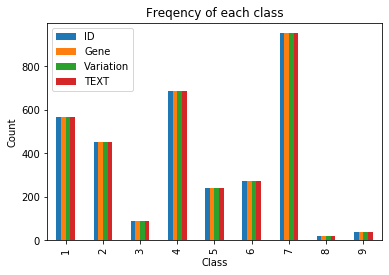

In [21]:
# Total frequency count by their class 
txt = result.groupby("Class").count()
print(txt)
txt.plot(kind = "bar")
plt.title("Freqency of each class")
plt.ylabel("Count")
plt.show() 

In [22]:
# Plot word cloud of all texts present in corresponding classs
def plot_word_cloud(txt):
    # store each word from text
    cloud = " ".join(word for word in txt)
    # Remove duplicate words
    stopwords = set(STOPWORDS) 
    # call built-in method WordCloud for creating an object for drawing a word cloud 
    wordcloud = WordCloud(width = 1000, height = 600, background_color ='white', stopwords = stopwords).generate(cloud)
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 8))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off") 
    plt.title("World cloud of each text with its corresponding Class")
    plt.show()

Total number of text in class 1 is: 566


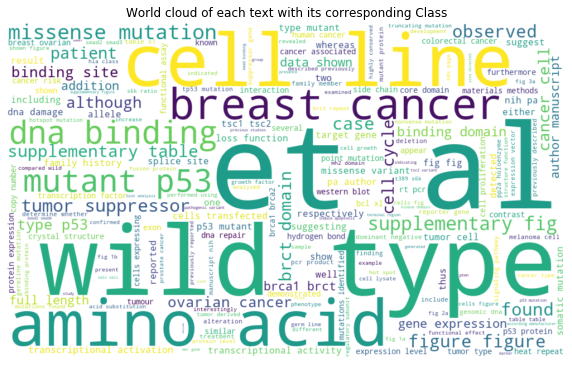

Total number of text in class 2 is: 452


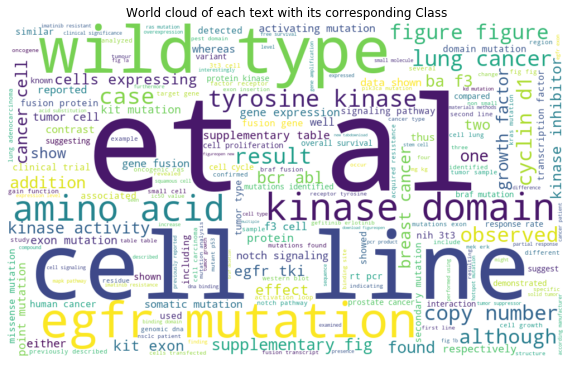

Total number of text in class 3 is: 89


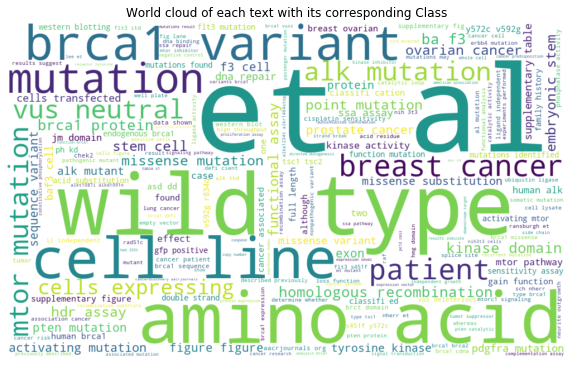

Total number of text in class 4 is: 686


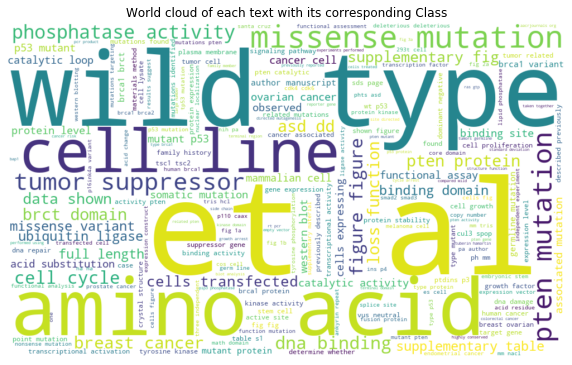

Total number of text in class 5 is: 242


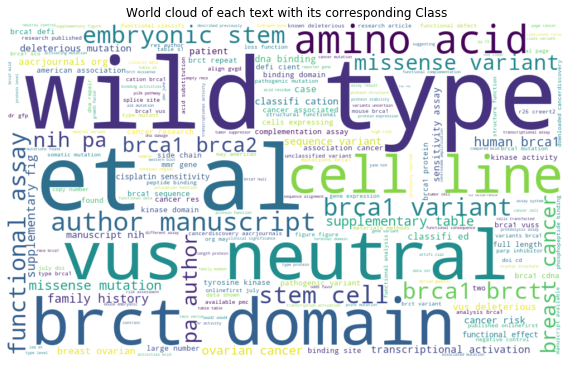

Total number of text in class 6 is: 273


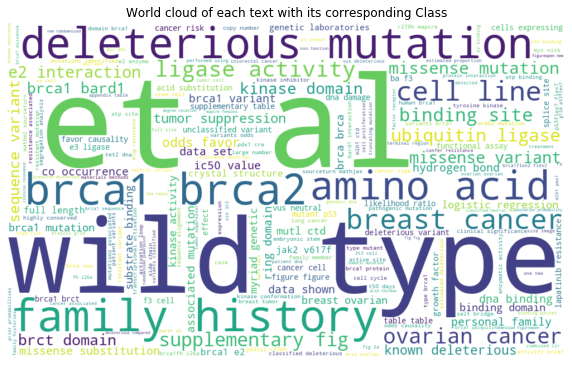

Total number of text in class 7 is: 952


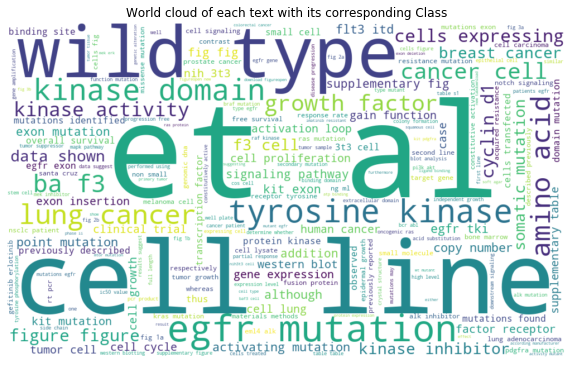

Total number of text in class 8 is: 19


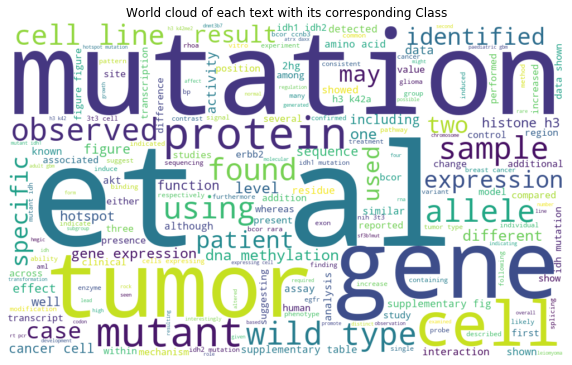

In [23]:
# For each Class, group with its corresponding Text.
from wordcloud import STOPWORDS, WordCloud
cl = result.groupby("Class")["TEXT"].count()
for i in range(1, len(cl)+1):
    l = list()
    label = result.groupby(["Class"]).groups[i]
    # For each class lebel get the total text and put it into a list(l)
    for j in range(len(label)):
        l.append(result.loc[label[j]]["TEXT"])
    print("Total number of text in class {} is: {}".format(i, len(label)))
    # Call plot_word_cloud method to plot text in each class
    plot_word_cloud(l)

- As we have already seen it many sentences are repeating and hence their world cloud seems very similar.
- Cell, mutation, et al, wild type are the most repeated word among all the classes they are present.
- Some of the genes and variations are also found that in some classes like mutation, brca1, brca2 and many more. So, We can create a new feature out of it.

### Feature Engineering

As we have done all the text preprocessing now lets go to introduce some feature so that this hidden features can be easily understandable for the model and can perform good. <br>
source: - <br>
https://www.kaggle.com/sudalairajkumar/simple-feature-engg-notebook-spooky-author <br>
https://www.kaggle.com/dextrousjinx/brief-insight-on-genetic-variations<br>
https://www.kaggle.com/shivamb/extensive-text-data-feature-engineering

In [23]:
from collections import Counter
# Count total word in each row text
result["Word_Count"] = result["TEXT"].apply(lambda x: len(x.split(" ")))
# most often used words
result["Top_Word"] = result["TEXT"].apply(lambda x: np.array(list(dict(Counter(str(x).split()).most_common(1)).values())).astype("float32")).str.get(0)
# gene in text
result["Gene_In_Text"] = result.apply(lambda x: sum([True if gene in x["TEXT"] else False for gene in x["Gene"]]), axis = 1)
# variation in text
result["Variation_In_Text"] = result.apply(lambda x: sum([1 if var in x["TEXT"].split() else 0 for var in  x["Variation"]]), axis = 1)
# Gene_Variation 
result["Gene_Variation"] = result["Gene"] + " " + result["Variation"]
result.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  Word_Count  Top_Word  \
0  cyclin dependent kinases cdks regulate variety...        4371     129.0   
1  abstract background non small cell lung cancer...        4140     179.0   
2  abstract background non small cell lung cancer...        4140     179.0   
3  recent evidence demonstrated acquired uniparen...        3842     108.0   
4  oncogenic mutations monomeric casitas b lineag...        4255     178.0   

   Gene_In_Text  Variation_In_Text               Gene_Variation  
0             2                  6  FAM58A Truncating Mutations  
1             0                  3                    CBL W802*  
2             0                  3                    CBL Q249E  
3             0                  3                    CBL N454D  
4             0                  3                    CBL L399V

In [24]:
result_des = result.groupby("Class")["Word_Count"]
result_des.describe()

count         mean          std     min      25%     50%       75%  \
Class                                                                       
1      566.0  6757.720848  4651.811946   120.0  3539.00  5241.0   9219.00   
2      452.0  6720.101770  5541.063060    82.0  2995.00  4962.0   8855.00   
3       89.0  4761.089888  2635.796764  1414.0  3065.00  3842.0   5074.00   
4      686.0  6434.342566  5186.348538    32.0  3212.00  4486.0   8174.25   
5      242.0  5284.466942  2726.521638   120.0  3540.75  4863.0   6684.75   
6      273.0  5246.772894  2763.215228   160.0  3234.00  4962.0   6221.00   
7      952.0  8266.771008  7314.611276   304.0  3564.00  5967.0  10549.00   
8       19.0  7786.000000  3931.219065  1434.0  4152.00  8055.0  11259.00   
9       37.0  9309.324324  7493.196025   810.0  3437.00  7986.0  11494.00   

           max  
Class           
1      36777.0  
2      46370.0  
3      19188.0  
4      30476.0  
5      17050.0  
6      17256.0  
7      56426.0  
8      14282.0  
9      33101.0

#### Analysis of engineered features

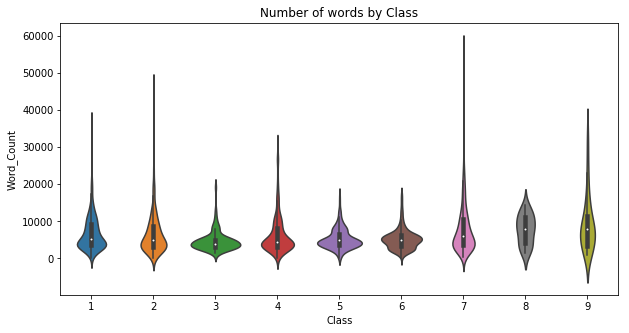

In [25]:
# Violin plot
# Word_Count
plt.figure(figsize = (10, 5))
sns.violinplot(x = "Class", y = "Word_Count", data = result)
plt.title("Number of words by Class")
plt.show()

- As violin plot is phenominal plot that can tell many things like mean, distribution, and percentiles. 
- Features Word_Count don't look promising to help in discriminating class from each other because each class density is between 0-1000 and they will simply overlap with each other. For sanity check/more clearation let's plot distribution plot

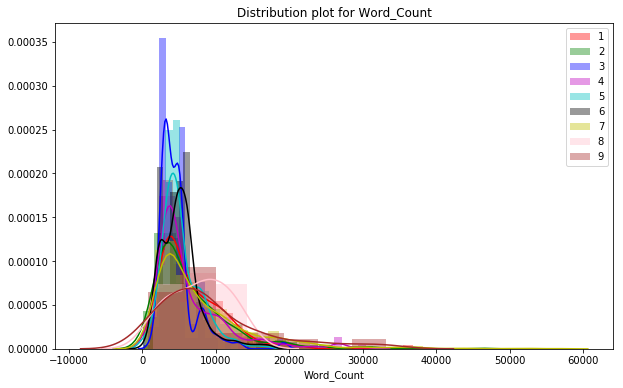

In [26]:
# Distribution plot for word count
plt.figure(figsize = (10, 6))
sns.distplot(result["Word_Count"][result["Class"] == 1], label = 1, color = "r")
sns.distplot(result["Word_Count"][result["Class"] == 2], label = 2, color = "g")
sns.distplot(result["Word_Count"][result["Class"] == 3], label = 3, color = "b")
sns.distplot(result["Word_Count"][result["Class"] == 4], label = 4, color = "m")
sns.distplot(result["Word_Count"][result["Class"] == 5], label = 5, color = "c")
sns.distplot(result["Word_Count"][result["Class"] == 6], label = 6, color = "k")
sns.distplot(result["Word_Count"][result["Class"] == 7], label = 7, color = "y")
sns.distplot(result["Word_Count"][result["Class"] == 8], label = 8, color = "pink")
sns.distplot(result["Word_Count"][result["Class"] == 9], label = 9, color = "brown")
plt.title("Distribution plot for Word_Count")
plt.legend()
plt.show() 

- As was said above

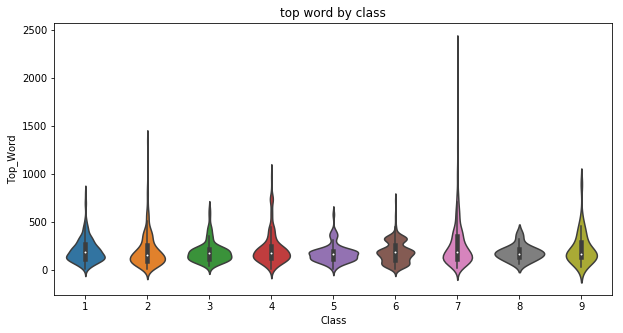

In [27]:
# Top words
plt.figure(figsize = (10, 5))
sns.violinplot(x = "Class", y = "Top_Word", data = result)
plt.title("top word by class")
plt.show()

- It looks also same as the previous one so this feature is also not so useful.

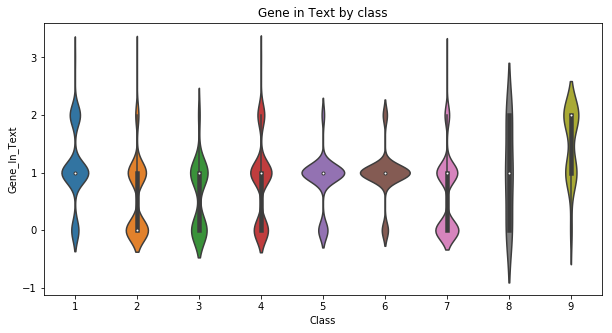

In [28]:
# Gene in text violin plot
plt.figure(figsize = (10, 5))
sns.violinplot(x = "Class", y = "Gene_In_Text", data = result)
plt.title("Gene in Text by class")
plt.show()

- It also has some overlap but looks quite interesting to discriminate features form other class. Let's plot dist plot to see if they can be helpful or not.

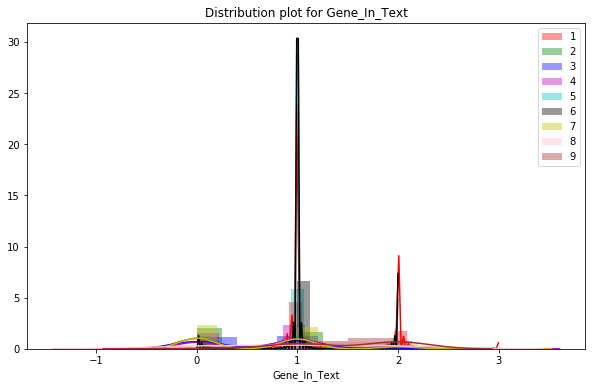

In [29]:
plt.figure(figsize = (10, 6))
sns.distplot(result["Gene_In_Text"][result["Class"] == 1], label = 1, color = "r")
sns.distplot(result["Gene_In_Text"][result["Class"] == 2], label = 2, color = "g")
sns.distplot(result["Gene_In_Text"][result["Class"] == 3], label = 3, color = "b")
sns.distplot(result["Gene_In_Text"][result["Class"] == 4], label = 4, color = "m")
sns.distplot(result["Gene_In_Text"][result["Class"] == 5], label = 5, color = "c")
sns.distplot(result["Gene_In_Text"][result["Class"] == 6], label = 6, color = "k")
sns.distplot(result["Gene_In_Text"][result["Class"] == 7], label = 7, color = "y")
sns.distplot(result["Gene_In_Text"][result["Class"] == 8], label = 8, color = "pink")
sns.distplot(result["Gene_In_Text"][result["Class"] == 9], label = 9, color = "brown")
plt.title("Distribution plot for Gene_In_Text")
plt.legend()
plt.show() 

Not most useful but let's use it also in model.

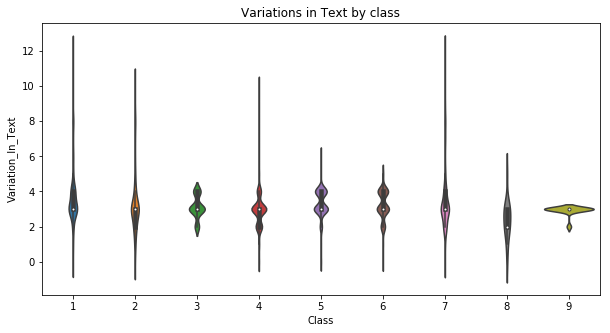

In [30]:
# Variation in text violin plot
plt.figure(figsize = (10, 5))
sns.violinplot(x = "Class", y = "Variation_In_Text", data = result)
plt.title("Variations in Text by class")
plt.show()

- This features also does not seems promising to decide class label because as we can see many of the classes are not clearly separable from other class but there are few classes which are seperable.

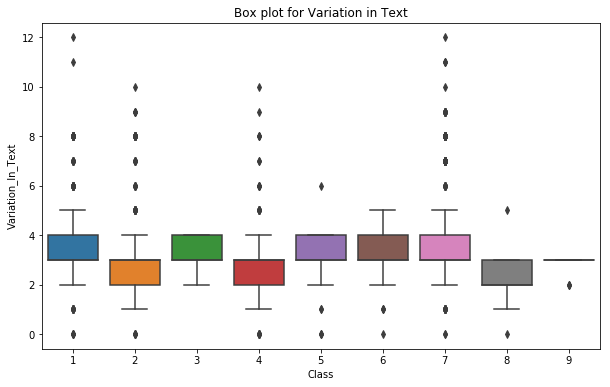

In [31]:
# Box plot for Variation in text
plt.figure(figsize = (10, 6))
sns.boxplot(x = "Class", y = "Variation_In_Text", data = result)
plt.title("Box plot for Variation in Text")
plt.show()

We introduced 3 new features and 1 out of 3 seems helpful which can be used to separate classes from each other. but, we will build model for surety using these features and check whether they are useful or not.

<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [181]:
y_true = result['Class'].values
result.Gene = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)    

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [182]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2121
Number of data points in test data: 664
Number of data points in cross validation data: 531


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

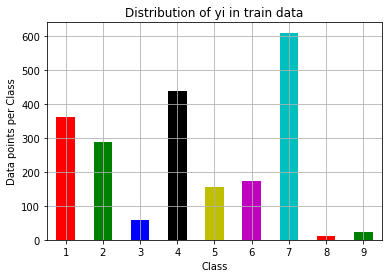

Number of data points in class 7 : 609 ( 28.713 %)
Number of data points in class 4 : 439 ( 20.698 %)
Number of data points in class 1 : 362 ( 17.067 %)
Number of data points in class 2 : 289 ( 13.626 %)
Number of data points in class 6 : 174 ( 8.204 %)
Number of data points in class 5 : 155 ( 7.308 %)
Number of data points in class 3 : 57 ( 2.687 %)
Number of data points in class 9 : 24 ( 1.132 %)
Number of data points in class 8 : 12 ( 0.566 %)
--------------------------------------------------------------------------------


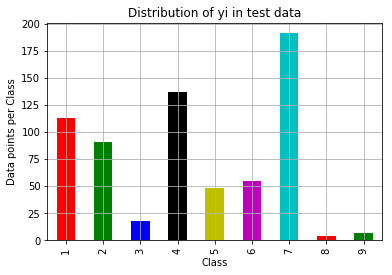

Number of data points in class 7 : 191 ( 28.765 %)
Number of data points in class 4 : 137 ( 20.633 %)
Number of data points in class 1 : 113 ( 17.018 %)
Number of data points in class 2 : 91 ( 13.705 %)
Number of data points in class 6 : 55 ( 8.283 %)
Number of data points in class 5 : 48 ( 7.229 %)
Number of data points in class 3 : 18 ( 2.711 %)
Number of data points in class 9 : 7 ( 1.054 %)
Number of data points in class 8 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


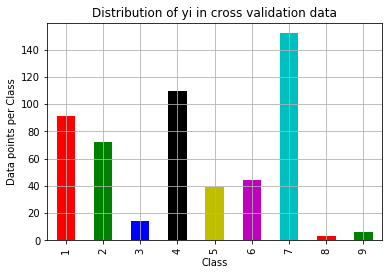

Number of data points in class 7 : 152 ( 28.625 %)
Number of data points in class 4 : 110 ( 20.716 %)
Number of data points in class 1 : 91 ( 17.137 %)
Number of data points in class 2 : 72 ( 13.559 %)
Number of data points in class 6 : 44 ( 8.286 %)
Number of data points in class 5 : 39 ( 7.345 %)
Number of data points in class 3 : 14 ( 2.637 %)
Number of data points in class 9 : 6 ( 1.13 %)
Number of data points in class 8 : 3 ( 0.565 %)


In [183]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

#my_colors = 'rgbkymc'
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c'] 
train_class_distribution.plot(kind='bar', color = my_colors, rot = 0)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
#my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
#my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [184]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.46660491528063
Log loss on Test Data using Random Model 2.422619793258953
-------------------- Confusion matrix --------------------


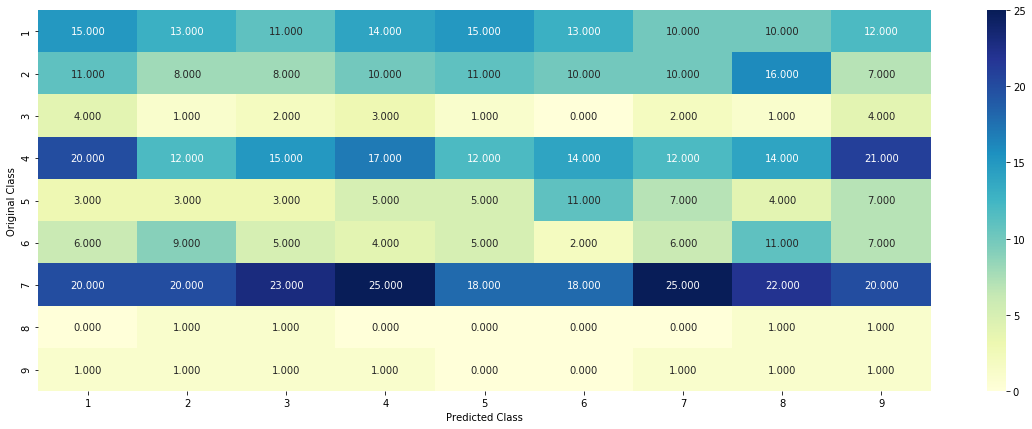

-------------------- Precision matrix (Columm Sum=1) --------------------


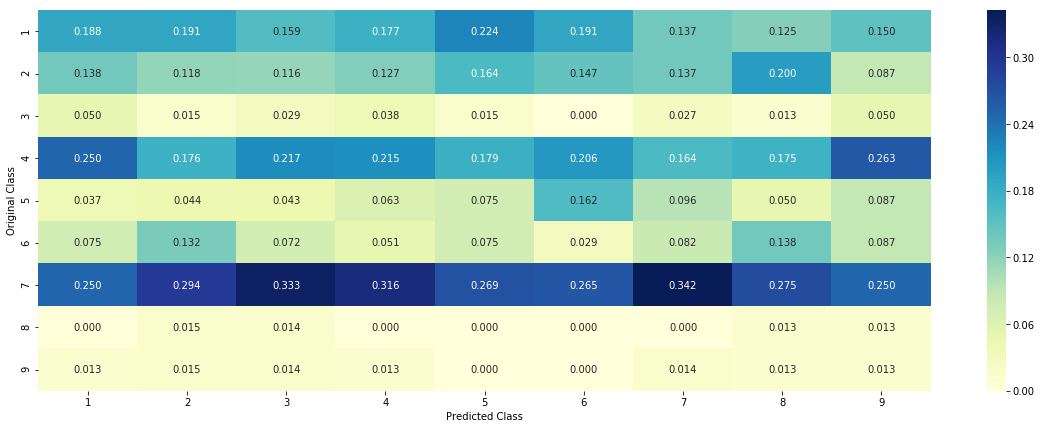

-------------------- Recall matrix (Row sum=1) --------------------


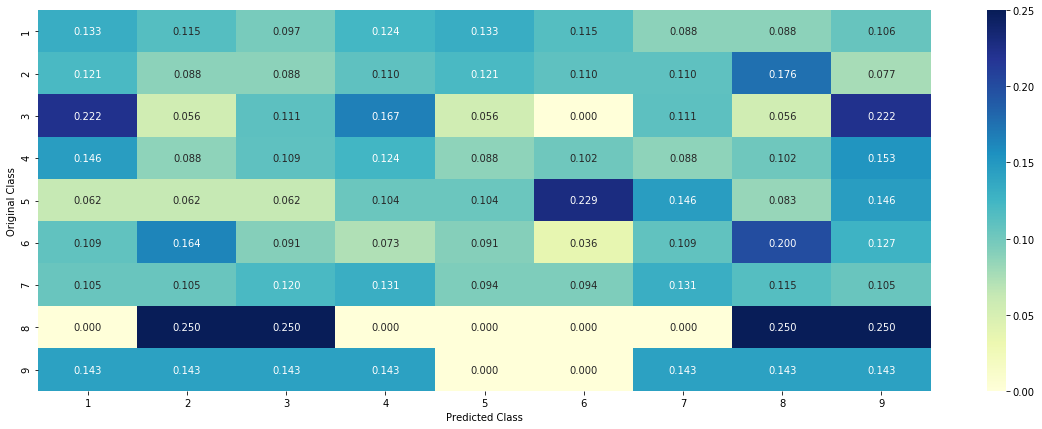

In [185]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))

# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h2>3.3 Univariate Analysis</h2>

In [186]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [187]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0]) 
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 232
BRCA1     163
TP53      105
EGFR       88
PTEN       79
BRCA2      75
KIT        62
BRAF       52
ERBB2      45
PDGFRA     43
ALK        41
Name: Gene, dtype: int64


In [188]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 232 different categories of genes in the train data, and they are distibuted as follows


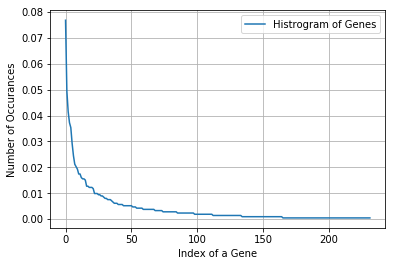

In [189]:
s = sum(unique_genes.values);
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

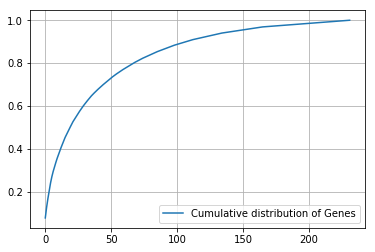

In [190]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [191]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [192]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2121, 9)


In [193]:
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [194]:
train_df['Gene'].head()

1221    PIK3CB
386       TP53
632      FBXW7
1581       MPL
224       EGFR
Name: Gene, dtype: object

In [195]:
gene_vectorizer.get_feature_names()[:10]

['abl1', 'acvr1', 'ago2', 'akt1', 'akt2', 'akt3', 'alk', 'apc', 'ar', 'araf']

In [196]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2121, 231)


In [197]:
#gene_vectorizer_tfidf.get_feature_names()[:10]

In [198]:
#print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding_tfidf.shape)

<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.3690192657089428
For values of alpha =  0.0001 The log loss is: 1.1342269416012938
For values of alpha =  0.001 The log loss is: 1.1498742416229528
For values of alpha =  0.01 The log loss is: 1.2426811159844924
For values of alpha =  0.1 The log loss is: 1.3753233617902914
For values of alpha =  1 The log loss is: 1.428921346891345


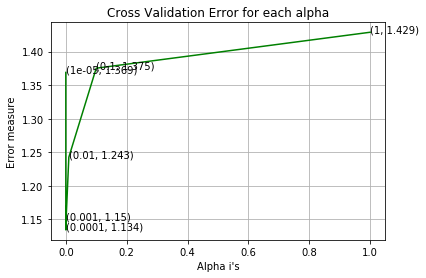

For values of best alpha =  0.0001 The train log loss is: 1.0652059120930901
For values of best alpha =  0.0001 The cross validation log loss is: 1.1342269416012938
For values of best alpha =  0.0001 The test log loss is: 1.1991801993731883


In [199]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [200]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  232  genes in train dataset?
Ans
1. In test data 640 out of 664 : 96.3855421686747
2. In cross validation data 516 out of  531 : 97.17514124293785


### Featurize Gene_Variation Feature

In [201]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_Variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene_Variation", train_df))
# test gene feature
test_gene_Variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene_Variation", test_df))
# cross validation gene feature
cv_gene_Variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene_Variation", cv_df))

In [202]:
print("train_gene_variation_feature_responseCoding is converted feature using respone coding method. The shape of gene variation feature:",train_gene_Variation_feature_responseCoding.shape)

train_gene_variation_feature_responseCoding is converted feature using respone coding method. The shape of gene variation feature: (2121, 9)


In [203]:
# one-hot encoding of Gene feature.
gene_Variation_vectorizer = CountVectorizer()
train_gene_Variation_feature_onehotCoding = gene_Variation_vectorizer.fit_transform(train_df['Gene_Variation'])
test_gene_Variation_feature_onehotCoding = gene_Variation_vectorizer.transform(test_df['Gene_Variation'])
cv_gene_Variation_feature_onehotCoding = gene_Variation_vectorizer.transform(cv_df['Gene_Variation'])

In [204]:
train_df['Gene_Variation'].head()

1221    PIK3CB E552K
386       TP53 V274F
632      FBXW7 G423R
1581       MPL W515L
224       EGFR G719D
Name: Gene_Variation, dtype: object

In [205]:
gene_Variation_vectorizer.get_feature_names()[:10]

['11',
 '126',
 '13',
 '19',
 '1_2009trunc',
 '20',
 '2010_2471trunc',
 '256_286trunc',
 '385_418del',
 '51']

In [206]:
print("train_gene_variation_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene variation feature:",train_gene_Variation_feature_onehotCoding.shape)

train_gene_variation_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene variation feature: (2121, 2151)


For values of alpha =  1e-05 The log loss is: 1.2491096857628325
For values of alpha =  0.0001 The log loss is: 1.0616043575340264
For values of alpha =  0.001 The log loss is: 1.0785889657520136
For values of alpha =  0.01 The log loss is: 1.1923220895511746
For values of alpha =  0.1 The log loss is: 1.3309505902123229
For values of alpha =  1 The log loss is: 1.3778087219517434


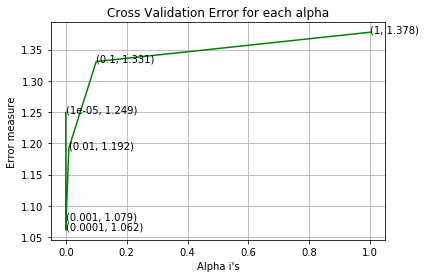

For values of best alpha =  0.0001 The train log loss is: 0.5251251316551567
For values of best alpha =  0.0001 The cross validation log loss is: 1.0616043575340264
For values of best alpha =  0.0001 The test log loss is: 1.11295119990421


In [207]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_Variation_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_Variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_Variation_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_Variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_Variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_Variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_Variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_Variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


Looks like very helpful feature, We will use it in predicting class label

#### Word_Count Feature 

For values of alpha =  1e-05 The log loss is: 1.821522586282192
For values of alpha =  0.0001 The log loss is: 1.8215225862819278
For values of alpha =  0.001 The log loss is: 1.8195817730091763
For values of alpha =  0.01 The log loss is: 1.813511384885157
For values of alpha =  0.1 The log loss is: 1.8116933684208492
For values of alpha =  1 The log loss is: 1.8115552070982626


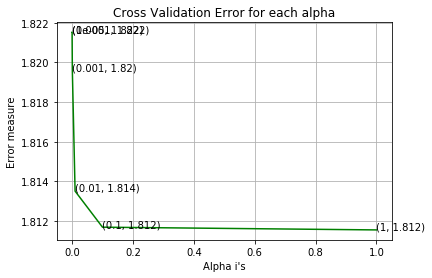

For values of best alpha =  1 The train log loss is: 1.8100088079441305
For values of best alpha =  1 The cross validation log loss is: 1.8115552070982626
For values of best alpha =  1 The test log loss is: 1.815451894606759


In [208]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df["Word_Count"].values.reshape(-1, 1), y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df["Word_Count"].values.reshape(-1, 1), y_train)
    predict_y = sig_clf.predict_proba(cv_df["Word_Count"].values.reshape(-1, 1))
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df["Word_Count"].values.reshape(-1, 1), y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df["Word_Count"].values.reshape(-1, 1), y_train)

predict_y = sig_clf.predict_proba(train_df["Word_Count"].values.reshape(-1, 1))
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df["Word_Count"].values.reshape(-1, 1))
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df["Word_Count"].values.reshape(-1, 1))
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


#### Top_Words Feature

For values of alpha =  1e-05 The log loss is: 1.8166591845858113
For values of alpha =  0.0001 The log loss is: 1.8180767541439347
For values of alpha =  0.001 The log loss is: 1.815632001993364
For values of alpha =  0.01 The log loss is: 1.8154993945382831
For values of alpha =  0.1 The log loss is: 1.815500412745464
For values of alpha =  1 The log loss is: 1.815500412762228


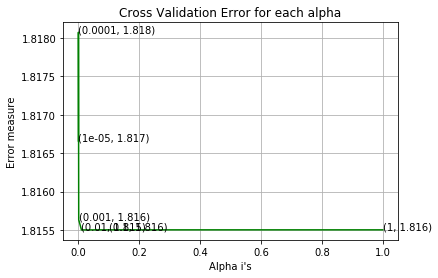

For values of best alpha =  0.01 The train log loss is: 1.8182730274488335
For values of best alpha =  0.01 The cross validation log loss is: 1.8154993945382831
For values of best alpha =  0.01 The test log loss is: 1.8151418481928192


In [209]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df["Top_Word"].values.reshape(-1, 1), y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df["Top_Word"].values.reshape(-1, 1), y_train)
    predict_y = sig_clf.predict_proba(cv_df["Top_Word"].values.reshape(-1, 1))
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df["Top_Word"].values.reshape(-1, 1), y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df["Top_Word"].values.reshape(-1, 1), y_train)

predict_y = sig_clf.predict_proba(train_df["Top_Word"].values.reshape(-1, 1))
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df["Top_Word"].values.reshape(-1, 1))
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df["Top_Word"].values.reshape(-1, 1))
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


Word_Count and Top_Word are not much important feature but let it be and used it also in prediction. We can remove any one of  them because their loss is approx same.

#### Gene_In_Text

For values of alpha =  1e-05 The log loss is: 1.788070184044064
For values of alpha =  0.0001 The log loss is: 1.7880701822035832
For values of alpha =  0.001 The log loss is: 1.788070182071563
For values of alpha =  0.01 The log loss is: 1.7880701786171982
For values of alpha =  0.1 The log loss is: 1.788070180582589
For values of alpha =  1 The log loss is: 1.7880701824580625


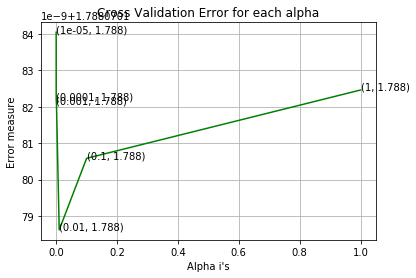

For values of best alpha =  0.01 The train log loss is: 1.7893256976115732
For values of best alpha =  0.01 The cross validation log loss is: 1.7880701786171982
For values of best alpha =  0.01 The test log loss is: 1.770645930488228


In [210]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df["Gene_In_Text"].values.reshape(-1, 1), y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df["Gene_In_Text"].values.reshape(-1, 1), y_train)
    predict_y = sig_clf.predict_proba(cv_df["Gene_In_Text"].values.reshape(-1, 1))
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df["Gene_In_Text"].values.reshape(-1, 1), y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df["Gene_In_Text"].values.reshape(-1, 1), y_train)

predict_y = sig_clf.predict_proba(train_df["Gene_In_Text"].values.reshape(-1, 1))
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df["Gene_In_Text"].values.reshape(-1, 1))
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df["Gene_In_Text"].values.reshape(-1, 1))
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


slightly better than the previous features let's build use it also in prediction, anyway far better than random model prediction.

#### Variation in text

For values of alpha =  1e-05 The log loss is: 1.8179446228734542
For values of alpha =  0.0001 The log loss is: 1.8179446222708717
For values of alpha =  0.001 The log loss is: 1.8179446274844642
For values of alpha =  0.01 The log loss is: 1.8179446197960598
For values of alpha =  0.1 The log loss is: 1.8179446212284713
For values of alpha =  1 The log loss is: 1.8179446243203428


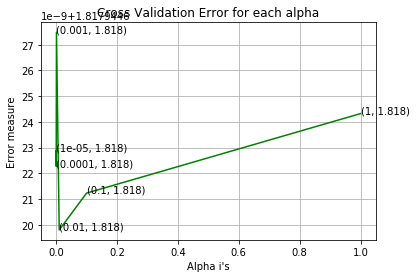

For values of best alpha =  0.01 The train log loss is: 1.810065447703158
For values of best alpha =  0.01 The cross validation log loss is: 1.8179446197960598
For values of best alpha =  0.01 The test log loss is: 1.8060210968185277


In [211]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df["Variation_In_Text"].values.reshape(-1, 1), y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df["Variation_In_Text"].values.reshape(-1, 1), y_train)
    predict_y = sig_clf.predict_proba(cv_df["Variation_In_Text"].values.reshape(-1, 1))
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df["Variation_In_Text"].values.reshape(-1, 1), y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df["Variation_In_Text"].values.reshape(-1, 1), y_train)

predict_y = sig_clf.predict_proba(train_df["Variation_In_Text"].values.reshape(-1, 1))
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df["Variation_In_Text"].values.reshape(-1, 1))
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df["Variation_In_Text"].values.reshape(-1, 1))
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

doesn't add much value. so we will use any of the features(top_word/word_count/variationintext) because all of these contains same value and adding all these features does not make any sense.

<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [212]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1924
Truncating_Mutations    62
Deletion                48
Amplification           38
Fusions                 23
Overexpression           6
E17K                     3
G12V                     3
Q61R                     2
EWSR1-ETV1_Fusion        2
Y64A                     2
Name: Variation, dtype: int64


In [213]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1924 different categories of variations in the train data, and they are distibuted as follows


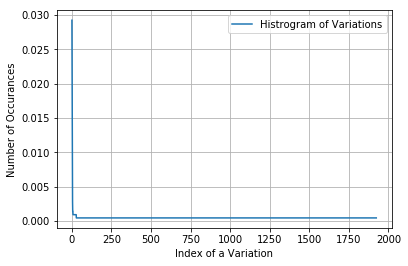

In [214]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02923149 0.05186233 0.06977841 ... 0.99905705 0.99952852 1.        ]


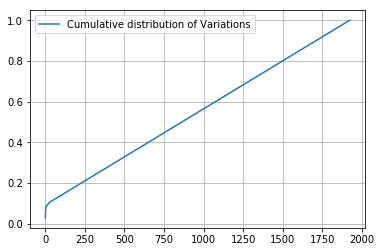

In [215]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [216]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [217]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2121, 9)


In [218]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [219]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2121, 1957)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.7328238959874187
For values of alpha =  0.0001 The log loss is: 1.7224211141934591
For values of alpha =  0.001 The log loss is: 1.7227498351503416
For values of alpha =  0.01 The log loss is: 1.7301364291002441
For values of alpha =  0.1 The log loss is: 1.7350225356762938
For values of alpha =  1 The log loss is: 1.736251421904913


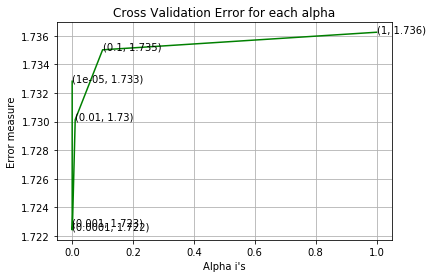

For values of best alpha =  0.0001 The train log loss is: 0.7661535224729547
For values of best alpha =  0.0001 The cross validation log loss is: 1.7224211141934591
For values of best alpha =  0.0001 The test log loss is: 1.6979544592561928


In [220]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [221]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1924  genes in test and cross validation data sets?
Ans
1. In test data 72 out of 664 : 10.843373493975903
2. In cross validation data 49 out of  531 : 9.227871939736348


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [222]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [223]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [224]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df = 3, ngram_range = (1, 2), max_features = 3000)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 3000


In [225]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [226]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [227]:
# https://stackoverflow.com/a/16202486 
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [228]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [229]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [230]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur).most_common(10))

[(1086, 11), (923, 9), (1263, 7), (1225, 7), (967, 7), (942, 7), (1303, 6), (1256, 6), (1160, 6), (968, 6)]


For values of alpha =  1e-05 The log loss is: 1.2009154826139952
For values of alpha =  0.0001 The log loss is: 1.1078579542898233
For values of alpha =  0.001 The log loss is: 1.2332299285069905
For values of alpha =  0.01 The log loss is: 1.4853044379637452
For values of alpha =  0.1 The log loss is: 1.77592460373325
For values of alpha =  1 The log loss is: 1.8317930135159979


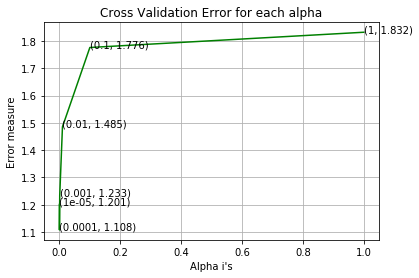

For values of best alpha =  0.0001 The train log loss is: 0.8011052202688078
For values of best alpha =  0.0001 The cross validation log loss is: 1.1078579542898233
For values of best alpha =  0.0001 The test log loss is: 1.1427099774190228


In [231]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [232]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [233]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

8.93 % of word of test data appeared in train data
9.642 % of word of Cross Validation appeared in train data


# BOW featurization for LogisticRegression

In [234]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding_LR = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding_LR = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding_LR = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [235]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding_LR.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2121, 9)


In [236]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding_LR = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding_LR = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding_LR = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [237]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding_LR.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2121, 9)


In [238]:
# one-hot encoding of Gene feature.
gene_vectorizer_LR = CountVectorizer()
train_gene_feature_onehotCoding_LR = gene_vectorizer_LR.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding_LR = gene_vectorizer_LR.transform(test_df['Gene'])
cv_gene_feature_onehotCoding_LR = gene_vectorizer_LR.transform(cv_df['Gene'])

In [239]:
# one-hot encoding of variation feature.
variation_vectorizer_LR = CountVectorizer()
train_variation_feature_onehotCoding_LR = variation_vectorizer_LR.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding_LR = variation_vectorizer_LR.transform(test_df['Variation'])
cv_variation_feature_onehotCoding_LR = variation_vectorizer_LR.transform(cv_df['Variation'])

In [240]:
# one-hot encoding of Gene feature.
gene_Variation_vectorizer_LR = CountVectorizer()
train_gene_Variation_feature_onehotCoding_LR = gene_Variation_vectorizer.fit_transform(train_df['Gene_Variation'])
test_gene_Variation_feature_onehotCoding_LR = gene_Variation_vectorizer.transform(test_df['Gene_Variation'])
cv_gene_Variation_feature_onehotCoding_LR = gene_Variation_vectorizer.transform(cv_df['Gene_Variation'])

In [241]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer_LR = CountVectorizer(ngram_range = (1, 2), min_df = 3, max_features = 3000)
train_text_feature_onehotCoding_LR = text_vectorizer_LR.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features_LR = text_vectorizer_LR.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts_LR = train_text_feature_onehotCoding_LR.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict_LR = dict(zip(list(train_text_features_LR),train_text_fea_counts_LR))


print("Total number of unique words in train data :", len(train_text_features_LR))

Total number of unique words in train data : 3000


In [242]:
dict_list_LR = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text_LR = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list_LR.append(extract_dictionary_paddle(cls_text_LR))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict_LR = extract_dictionary_paddle(train_df)


confuse_array_LR = []
for i in train_text_features_LR:
    ratios_LR = []
    max_val_LR = -1
    for j in range(0,9):
        ratios_LR.append((dict_list_LR[j][i]+10 )/(total_dict_LR[i]+90))
    confuse_array_LR.append(ratios)
confuse_array_LR = np.array(confuse_array_LR)

In [243]:
#response coding of text features
train_text_feature_responseCoding_LR  = get_text_responsecoding(train_df)
test_text_feature_responseCoding_LR  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding_LR  = get_text_responsecoding(cv_df)

In [244]:
# https://stackoverflow.com/a/16202486 
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding_LR = (train_text_feature_responseCoding_LR.T/train_text_feature_responseCoding_LR.sum(axis=1)).T
test_text_feature_responseCoding_LR = (test_text_feature_responseCoding_LR.T/test_text_feature_responseCoding_LR.sum(axis=1)).T
cv_text_feature_responseCoding_LR = (cv_text_feature_responseCoding_LR.T/cv_text_feature_responseCoding_LR.sum(axis=1)).T

In [245]:
# don't forget to normalize every feature
train_text_feature_onehotCoding_LR = normalize(train_text_feature_onehotCoding_LR, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding_LR = text_vectorizer_LR.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding_LR = normalize(test_text_feature_onehotCoding_LR, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding_LR = text_vectorizer_LR.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding_LR = normalize(cv_text_feature_onehotCoding_LR, axis=0)

In [246]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict_LR = dict(sorted(text_fea_dict_LR.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur_LR = np.array(list(sorted_text_fea_dict_LR.values()))

In [247]:
# Number of words for a given frequency. 
print(Counter(sorted_text_occur_LR).most_common(10))

[(1086, 11), (923, 9), (1263, 7), (1225, 7), (967, 7), (942, 7), (1303, 6), (1256, 6), (1160, 6), (968, 6)]


For values of alpha =  1e-05 The log loss is: 1.2009154826139952
For values of alpha =  0.0001 The log loss is: 1.1078579542898233
For values of alpha =  0.001 The log loss is: 1.2332299285069905
For values of alpha =  0.01 The log loss is: 1.4853044379637452
For values of alpha =  0.1 The log loss is: 1.77592460373325
For values of alpha =  1 The log loss is: 1.8317930135159979


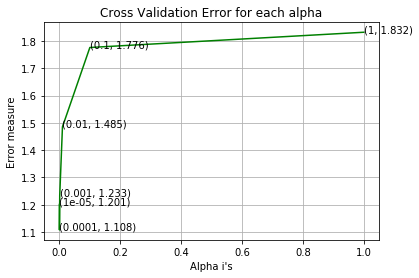

For values of best alpha =  0.0001 The train log loss is: 0.8011052202688078
For values of best alpha =  0.0001 The cross validation log loss is: 1.1078579542898233
For values of best alpha =  0.0001 The test log loss is: 1.1427099774190228


In [248]:
# Train a Logistic regression+Calibration model using text features which are on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array_LR = []
for i in alpha:
    clf_LR = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf_LR.fit(train_text_feature_onehotCoding_LR, y_train)
    
    sig_clf_LR = CalibratedClassifierCV(clf_LR, method="sigmoid")
    sig_clf_LR.fit(train_text_feature_onehotCoding_LR, y_train)
    predict_y_LR = sig_clf_LR.predict_proba(cv_text_feature_onehotCoding_LR)
    cv_log_error_array_LR.append(log_loss(y_cv, predict_y_LR, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y_LR, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array_LR,c='g')
for i, txt in enumerate(np.round(cv_log_error_array_LR,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array_LR[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha_LR = np.argmin(cv_log_error_array_LR)
clf_LR = SGDClassifier(alpha=alpha[best_alpha_LR], penalty='l2', loss='log', random_state=42)
clf_LR.fit(train_text_feature_onehotCoding_LR, y_train)
sig_clf_LR = CalibratedClassifierCV(clf_LR, method="sigmoid")
sig_clf_LR.fit(train_text_feature_onehotCoding_LR, y_train)

predict_y_LR = sig_clf_LR.predict_proba(train_text_feature_onehotCoding_LR)
print('For values of best alpha = ', alpha[best_alpha_LR], "The train log loss is:",log_loss(y_train, predict_y_LR, labels=clf.classes_, eps=1e-15))
predict_y_LR = sig_clf_LR.predict_proba(cv_text_feature_onehotCoding_LR)
print('For values of best alpha = ', alpha[best_alpha_LR], "The cross validation log loss is:",log_loss(y_cv, predict_y_LR, labels=clf.classes_, eps=1e-15))
predict_y_LR = sig_clf_LR.predict_proba(test_text_feature_onehotCoding_LR)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y_LR, labels=clf.classes_, eps=1e-15))

<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [249]:
def get_intersec_text_LR(df):
    df_text_vec_LR = CountVectorizer(min_df=3)
    df_text_fea_LR = df_text_vec_LR.fit_transform(df['TEXT'])
    df_text_features_LR = df_text_vec_LR.get_feature_names()

    df_text_fea_counts_LR = df_text_fea_LR.sum(axis=0).A1
    df_text_fea_dict_LR = dict(zip(list(df_text_features_LR),df_text_fea_counts_LR))
    len1_LR = len(set(df_text_features_LR))
    len2_LR = len(set(train_text_features_LR) & set(df_text_features_LR))
    return len1_LR,len2_LR

In [250]:
len1_LR,len2_LR = get_intersec_text_LR(test_df)
print(np.round((len2_LR/len1_LR)*100, 3), "% of word of test data appeared in train data")
len1_LR,len2_LR = get_intersec_text_LR(cv_df)
print(np.round((len2_LR/len1_LR)*100, 3), "% of word of Cross Validation appeared in train data")

8.93 % of word of test data appeared in train data
9.642 % of word of Cross Validation appeared in train data


<h1>4. Machine Learning Models</h1>

In [251]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [252]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [253]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = TfidfVectorizer(ngram_range = (1, 2), min_df = 3, max_features = 3000)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            try:
                
                word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
                yes_no = True if word in text.split() else False
                if yes_no:
                    word_present += 1
                    print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))
            except:
                pass

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Left"> <b>Stacking the all of the features </b><p>

In [254]:
# https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.column_stack.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.hstack.html
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]


train_word_count = train_df["Word_Count"].values.reshape(-1, 1)
train_word_count = (train_word_count - min(train_word_count))/(max(train_word_count) - min(train_word_count)) 
test_word_count = test_df["Word_Count"].values.reshape(-1, 1)
test_word_count = (test_word_count - min(test_word_count))/(max(test_word_count) - min(test_word_count))
cv_word_count = cv_df["Word_Count"].values.reshape(-1, 1)
cv_word_count = (cv_word_count - min(cv_word_count))/(max(cv_word_count) - min(cv_word_count))

train_unique_word = train_df["Top_Word"].values.reshape(-1, 1)
train_unique_word = (train_unique_word - min(train_unique_word))/(max(train_unique_word) - min(train_unique_word))
test_unique_word = test_df["Top_Word"].values.reshape(-1, 1)
test_unique_word = (test_unique_word - min(test_unique_word))/(max(test_unique_word) - min(test_unique_word))
cv_unique_word = cv_df["Top_Word"].values.reshape(-1, 1)
cv_unique_word = (cv_unique_word - min(cv_unique_word))/(max(cv_unique_word) - min(cv_unique_word))

train_avg_len = train_df["Gene_In_Text"].values.reshape(-1, 1)
train_avg_len = (train_avg_len - min(train_avg_len))/(max(train_avg_len) - min(train_avg_len))
test_avg_len = test_df["Gene_In_Text"].values.reshape(-1, 1)
test_avg_len = (test_avg_len - min(test_avg_len))/(max(test_avg_len) - min(test_avg_len))
cv_avg_len = cv_df["Gene_In_Text"].values.reshape(-1, 1)
cv_avg_len = (cv_avg_len - min(cv_avg_len))/(max(cv_avg_len) - min(cv_avg_len))

train_var_in_txt = train_df["Variation_In_Text"].values.reshape(-1, 1)
train_var_in_txt = (train_var_in_txt - min(train_var_in_txt))/(max(train_var_in_txt) - min(train_var_in_txt))
test_var_in_txt = test_df["Variation_In_Text"].values.reshape(-1, 1)
test_var_in_txt = (test_var_in_txt - min(test_var_in_txt))/(max(test_var_in_txt) - min(test_var_in_txt))
cv_var_in_txt = cv_df["Variation_In_Text"].values.reshape(-1, 1)
cv_var_in_txt = (cv_var_in_txt - min(cv_var_in_txt))/(max(cv_var_in_txt) - min(cv_var_in_txt))

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding, train_gene_Variation_feature_onehotCoding,))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding, test_gene_Variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding, cv_gene_Variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding, train_word_count, train_unique_word, train_avg_len, train_var_in_txt)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding, test_word_count, test_unique_word, test_avg_len, test_var_in_txt)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding, cv_word_count, cv_unique_word, cv_avg_len, cv_var_in_txt)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding, train_gene_Variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding, test_gene_Variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding, cv_gene_Variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding, train_word_count,  train_unique_word, train_avg_len, train_var_in_txt))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding, test_word_count, test_unique_word, test_avg_len, test_var_in_txt))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding, cv_word_count,  cv_unique_word, cv_avg_len, cv_var_in_txt))


In [255]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape) 

One hot encoding features :
(number of data points * number of features) in train data =  (2121, 7343)
(number of data points * number of features) in test data =  (664, 7343)
(number of data points * number of features) in cross validation data = (531, 7343)


In [256]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2121, 40)
(number of data points * number of features) in test data =  (664, 40)
(number of data points * number of features) in cross validation data = (531, 40)


## Stacking all the features for LogisticRegression

In [257]:
# https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.column_stack.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.hstack.html
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]


train_word_count_LR = train_df["Word_Count"].values.reshape(-1, 1)
train_word_count_LR = (train_word_count_LR - min(train_word_count_LR))/(max(train_word_count_LR) - min(train_word_count_LR))
test_word_count_LR = test_df["Word_Count"].values.reshape(-1, 1)
test_word_count_LR = (test_word_count_LR - min(test_word_count_LR))/(max(test_word_count_LR) - min(test_word_count_LR))
cv_word_count_LR = cv_df["Word_Count"].values.reshape(-1, 1)
cv_word_count_LR = (cv_word_count_LR - min(cv_word_count_LR))/(max(cv_word_count_LR) - min(cv_word_count_LR))

train_unique_word_LR = train_df["Top_Word"].values.reshape(-1, 1)
train_unique_word_LR = (train_unique_word_LR - min(train_unique_word_LR))/(max(train_unique_word_LR) - min(train_unique_word_LR))
test_unique_word_LR = test_df["Top_Word"].values.reshape(-1, 1)
test_unique_word_LR = (test_unique_word_LR - min(test_unique_word_LR))/(max(test_unique_word_LR) - min(test_unique_word_LR))
cv_unique_word_LR = cv_df["Top_Word"].values.reshape(-1, 1)
cv_unique_word_LR = (cv_unique_word_LR - min(cv_unique_word_LR))/(max(cv_unique_word_LR) - min(cv_unique_word_LR))

train_avg_len_LR = train_df["Gene_In_Text"].values.reshape(-1, 1)
train_avg_len_LR = (train_avg_len_LR - min(train_avg_len_LR))/(max(train_avg_len_LR) - min(train_avg_len_LR))
test_avg_len_LR = test_df["Gene_In_Text"].values.reshape(-1, 1)
test_avg_len_LR = (test_avg_len_LR - min(test_avg_len_LR))/(max(test_avg_len_LR) - min(test_avg_len_LR))
cv_avg_len_LR = cv_df["Gene_In_Text"].values.reshape(-1, 1)
cv_avg_len_LR = (cv_avg_len_LR - min(cv_avg_len_LR))/(max(cv_avg_len_LR) - min(cv_avg_len_LR))

train_var_in_txt_LR = train_df["Variation_In_Text"].values.reshape(-1, 1)
train_var_in_txt_LR = (train_var_in_txt_LR - min(train_var_in_txt_LR))/(max(train_var_in_txt_LR) - min(train_var_in_txt_LR))
test_var_in_txt_LR = test_df["Variation_In_Text"].values.reshape(-1, 1)
test_var_in_txt_LR = (test_var_in_txt_LR - min(test_var_in_txt_LR))/(max(test_var_in_txt_LR) - min(test_var_in_txt_LR))
cv_var_in_txt_LR = cv_df["Variation_In_Text"].values.reshape(-1, 1)
cv_var_in_txt_LR = (cv_var_in_txt_LR - min(cv_var_in_txt_LR))/(max(cv_var_in_txt_LR) - min(cv_var_in_txt_LR))


train_gene_var_onehotCoding_LR = hstack((train_gene_feature_onehotCoding_LR, train_variation_feature_onehotCoding_LR, train_gene_Variation_feature_onehotCoding_LR))
test_gene_var_onehotCoding_LR = hstack((test_gene_feature_onehotCoding_LR, test_variation_feature_onehotCoding_LR, test_gene_Variation_feature_onehotCoding_LR))
cv_gene_var_onehotCoding_LR = hstack((cv_gene_feature_onehotCoding_LR, cv_variation_feature_onehotCoding_LR, cv_gene_Variation_feature_onehotCoding_LR))

train_x_onehotCoding_LR = hstack((train_gene_var_onehotCoding_LR, train_text_feature_onehotCoding_LR, train_avg_len_LR, train_var_in_txt_LR)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding_LR = hstack((test_gene_var_onehotCoding_LR, test_text_feature_onehotCoding_LR, test_avg_len_LR, test_var_in_txt_LR)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding_LR = hstack((cv_gene_var_onehotCoding_LR, cv_text_feature_onehotCoding_LR, cv_avg_len_LR, cv_var_in_txt_LR)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding_LR = np.hstack((train_gene_feature_responseCoding_LR, train_variation_feature_responseCoding_LR, train_gene_Variation_feature_responseCoding))
test_gene_var_responseCoding_LR = np.hstack((test_gene_feature_responseCoding_LR, test_variation_feature_responseCoding_LR, test_gene_Variation_feature_responseCoding))
cv_gene_var_responseCoding_LR = np.hstack((cv_gene_feature_responseCoding_LR, cv_variation_feature_responseCoding_LR, cv_gene_Variation_feature_responseCoding))

train_x_responseCoding_LR = np.hstack((train_gene_var_responseCoding_LR, train_text_feature_responseCoding_LR, train_unique_word_LR, train_word_count_LR, train_avg_len_LR, train_var_in_txt_LR))
test_x_responseCoding_LR = np.hstack((test_gene_var_responseCoding_LR, test_text_feature_responseCoding_LR, test_unique_word_LR, test_word_count_LR, test_avg_len_LR, test_var_in_txt_LR))
cv_x_responseCoding_LR = np.hstack((cv_gene_var_responseCoding_LR, cv_text_feature_responseCoding_LR, cv_unique_word_LR, cv_word_count_LR, cv_avg_len_LR, cv_var_in_txt_LR))


In [258]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding_LR.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding_LR.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding_LR.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2121, 7341)
(number of data points * number of features) in test data =  (664, 7341)
(number of data points * number of features) in cross validation data = (531, 7341)


In [259]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding_LR.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding_LR.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding_LR.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2121, 40)
(number of data points * number of features) in test data =  (664, 40)
(number of data points * number of features) in cross validation data = (531, 40)


<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

for alpha = 1e-05
Log Loss : 1.1899030856856432
for alpha = 0.0001
Log Loss : 1.189442990135873
for alpha = 0.001
Log Loss : 1.1858048242875958
for alpha = 0.1
Log Loss : 1.156192501646144
for alpha = 1
Log Loss : 1.2879845010411926
for alpha = 10
Log Loss : 1.4866097173666106
for alpha = 100
Log Loss : 1.5164553947911898
for alpha = 1000
Log Loss : 1.4939804328024004


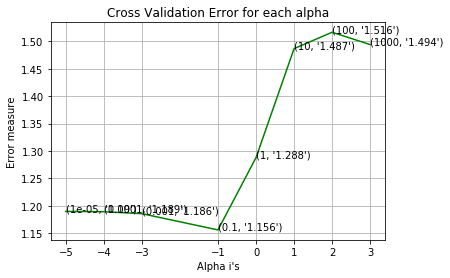

For values of best alpha =  0.1 The train log loss is: 0.6924405314582962
For values of best alpha =  0.1 The cross validation log loss is: 1.156192501646144
For values of best alpha =  0.1 The test log loss is: 1.2423758092848902


In [260]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.156192501646144
Number of missclassified point : 0.3314500941619586
-------------------- Confusion matrix --------------------


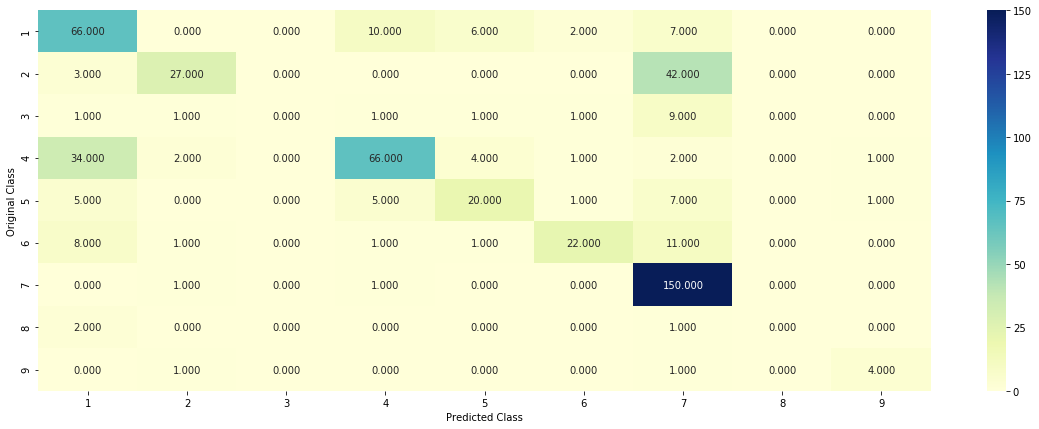

-------------------- Precision matrix (Columm Sum=1) --------------------


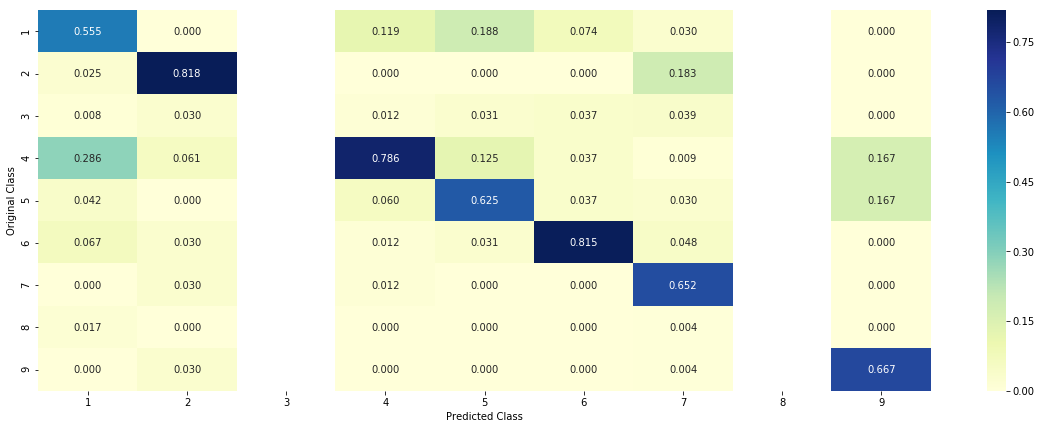

-------------------- Recall matrix (Row sum=1) --------------------


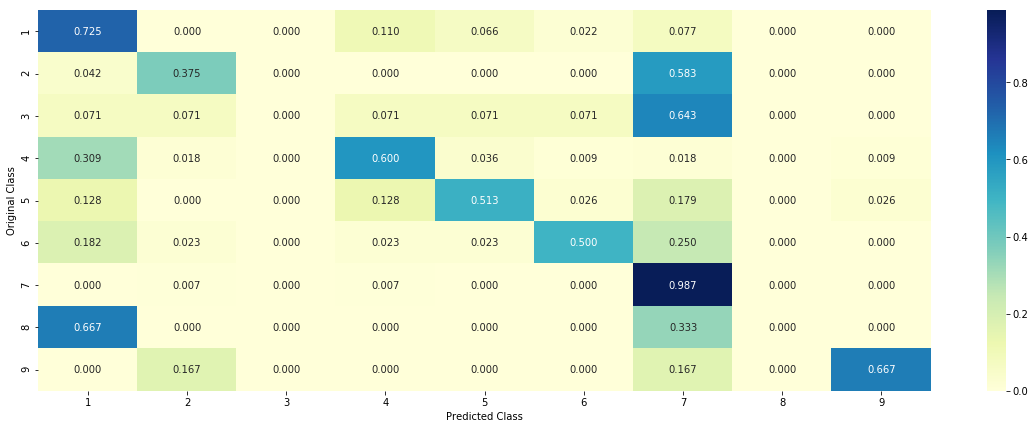

In [261]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [262]:
test_point_index = 23
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 9
Predicted Class Probabilities: [[0.0614 0.0525 0.0138 0.0783 0.0391 0.0363 0.0882 0.0052 0.6252]]
Actual Class : 9
--------------------------------------------------
2 Text feature [mild] present in test data point [True]
40 Text feature [status] present in test data point [True]
71 Text feature [please] present in test data point [True]
Out of the top  100  features  3 are present in query point


It is observed that when we limit ourself to choose only top 3k feature, most of the features disappear.

<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [264]:
test_point_index = 12
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50) 
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.6532 0.0565 0.0147 0.094  0.0413 0.0387 0.0932 0.0055 0.0029]]
Actual Class : 1
--------------------------------------------------
9 Text feature [4d] present in test data point [True]
21 Text feature [missense] present in test data point [True]
37 Text feature [spectrum] present in test data point [True]
45 Text feature [reporter] present in test data point [True]
60 Text feature [four] present in test data point [True]
90 Text feature [using] present in test data point [True]
94 Text feature [transformation] present in test data point [True]
98 Text feature [whether] present in test data point [True]
Out of the top  100  features  8 are present in query point


<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

for alpha = 5
Log Loss : 1.1986769804982833
for alpha = 11
Log Loss : 1.106496462665051
for alpha = 15
Log Loss : 1.0917277215498469
for alpha = 21
Log Loss : 1.0877575529226775
for alpha = 31
Log Loss : 1.1000634394097977
for alpha = 41
Log Loss : 1.0968926518410398
for alpha = 51
Log Loss : 1.1023962612482852
for alpha = 99
Log Loss : 1.177131812751324


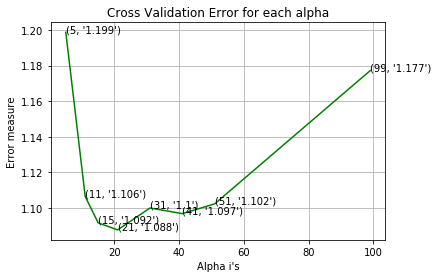

For values of best alpha =  21 The train log loss is: 0.9420429826006744
For values of best alpha =  21 The cross validation log loss is: 1.0877575529226775
For values of best alpha =  21 The test log loss is: 1.1375705925956285


In [265]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.0877575529226775
Number of mis-classified points : 0.3672316384180791
-------------------- Confusion matrix --------------------


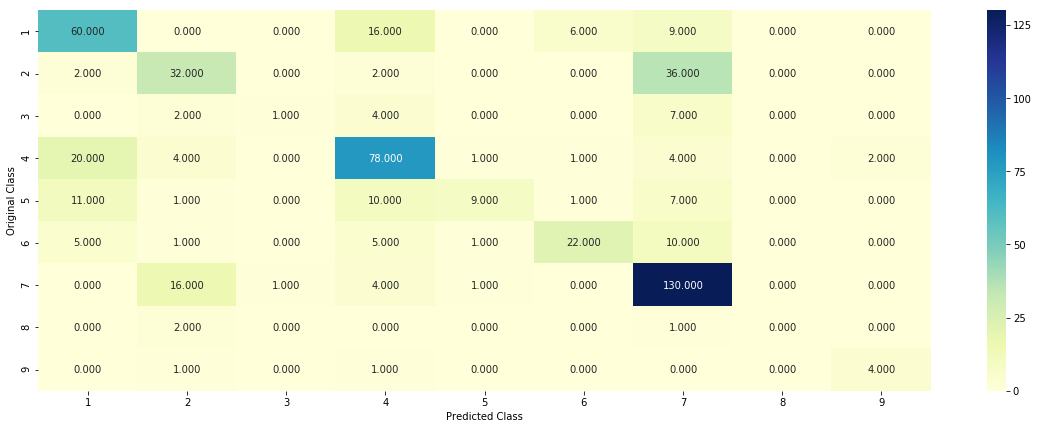

-------------------- Precision matrix (Columm Sum=1) --------------------


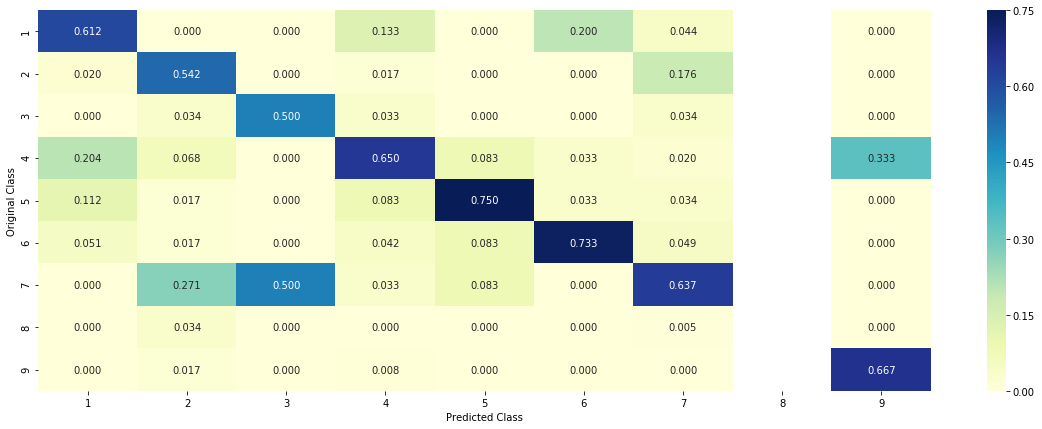

-------------------- Recall matrix (Row sum=1) --------------------


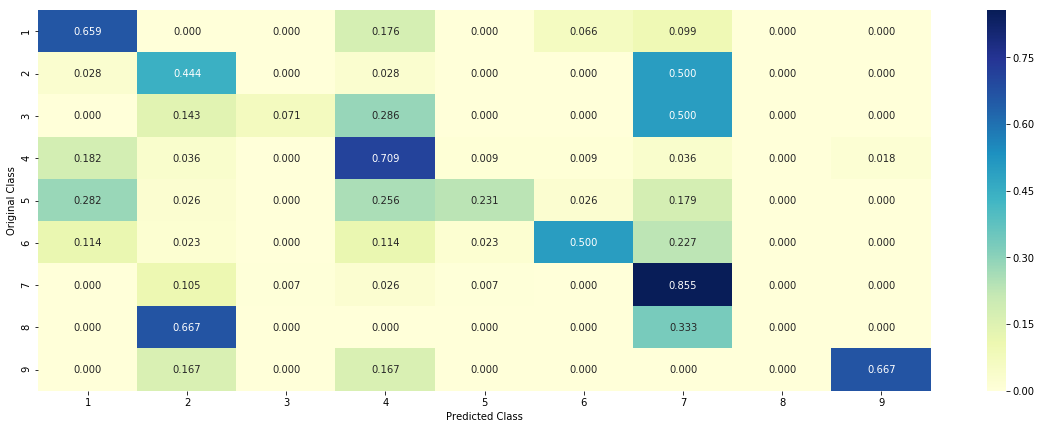

In [266]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

<h3>4.2.3.Sample Query point -1</h3>

In [267]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 79
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 1
Actual Class : 2
The  21  nearest neighbours of the test points belongs to classes [7 7 3 5 2 2 7 2 7 2 7 7 2 5 7 7 2 2 7 2 6]
Fequency of nearest points : Counter({7: 9, 2: 8, 5: 2, 3: 1, 6: 1})


<h3>4.2.4. Sample Query Point-2 </h3>

In [269]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 7

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 4
Actual Class : 4
the k value for knn is 21 and the nearest neighbours of the test points belongs to classes [4 1 5 5 1 1 6 4 4 4 4 1 4 4 1 4 4 4 4 1 7]
Fequency of nearest points : Counter({4: 11, 1: 6, 5: 2, 6: 1, 7: 1})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.1427459415875887
for alpha = 1e-05
Log Loss : 1.1123202025537082
for alpha = 0.0001
Log Loss : 0.9681333224194325
for alpha = 0.001
Log Loss : 0.9659124276640042
for alpha = 0.01
Log Loss : 1.1553608973702012
for alpha = 0.1
Log Loss : 1.6282481551489696
for alpha = 1
Log Loss : 1.7969629981922497
for alpha = 10
Log Loss : 1.8116849343799444
for alpha = 100
Log Loss : 1.813163793226277


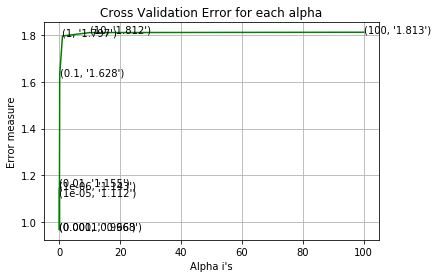

For values of best alpha =  0.001 The train log loss is: 0.5968579499172576
For values of best alpha =  0.001 The cross validation log loss is: 0.9659124276640042
For values of best alpha =  0.001 The test log loss is: 0.981602220415944


In [270]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding_LR, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding_LR, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_LR)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state = 42)
clf.fit(train_x_onehotCoding_LR, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_LR, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding_LR)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding_LR)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding_LR)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 0.9632574691621122
Number of mis-classified points : 0.3465160075329567
-------------------- Confusion matrix --------------------


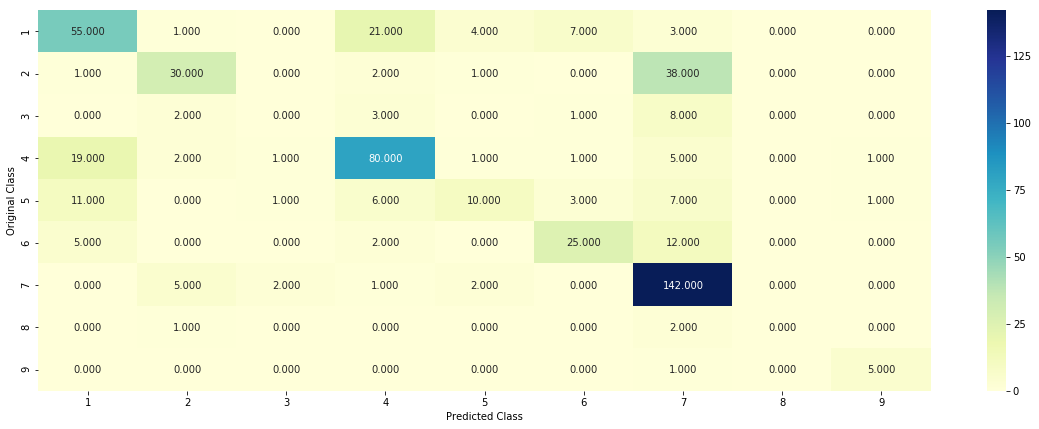

-------------------- Precision matrix (Columm Sum=1) --------------------


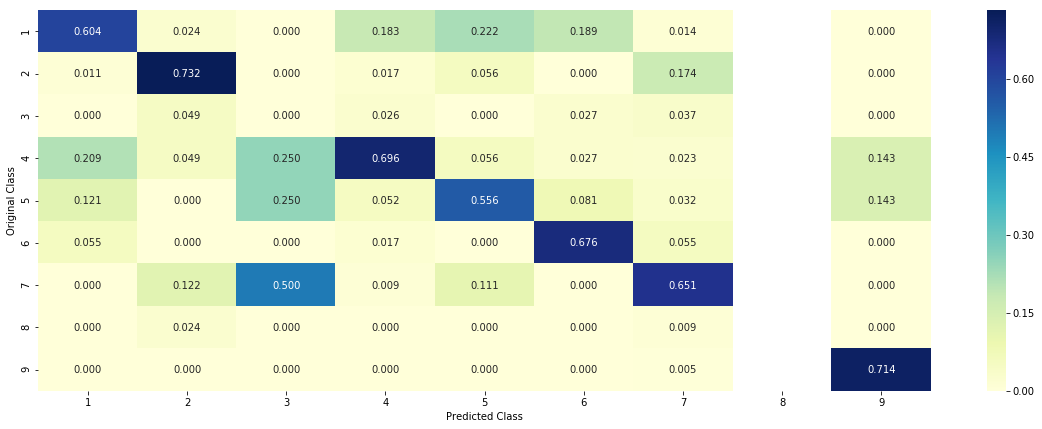

-------------------- Recall matrix (Row sum=1) --------------------


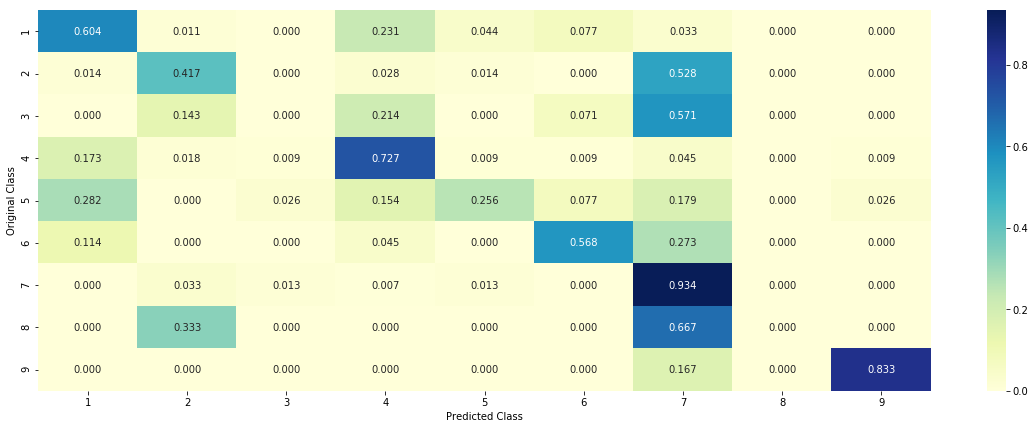

In [271]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.1.3. Feature Importance</h4>

In [272]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [314]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 43
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding_LR[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding_LR[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0153 0.0836 0.0019 0.0138 0.0664 0.081  0.7318 0.0053 0.0009]]
Actual Class : 7
--------------------------------------------------
3 Text feature [activate] present in test data point [True]
5 Text feature [department] present in test data point [True]
7 Text feature [favor] present in test data point [True]
15 Text feature [cancer] present in test data point [True]
17 Text feature [lines] present in test data point [True]
20 Text feature [32] present in test data point [True]
27 Text feature [harbored] present in test data point [True]
37 Text feature [able] present in test data point [True]
40 Text feature [cells] present in test data point [True]
59 Text feature [36] present in test data point [True]
65 Text feature [way] present in test data point [True]
80 Text feature [50] present in test data point [True]
83 Text feature [taken] present in test data point [True]
89 Text feature [hcl] present in test data point [True]
94 Text

<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [234]:
test_point_index = 53
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.0222 0.3817 0.0159 0.029  0.1339 0.0299 0.3784 0.0056 0.0035]]
Actual Class : 5
--------------------------------------------------
21 Text feature [activity] present in test data point [True]
28 Text feature [bearing] present in test data point [True]
30 Text feature [22] present in test data point [True]
37 Text feature [especially] present in test data point [True]
53 Text feature [also] present in test data point [True]
58 Text feature [akt2] present in test data point [True]
68 Text feature [mutation] present in test data point [True]
77 Text feature [78] present in test data point [True]
109 Text feature [33] present in test data point [True]
112 Text feature [jak2] present in test data point [True]
129 Text feature [others] present in test data point [True]
138 Text feature [akt1] present in test data point [True]
142 Text feature [although] present in test data point [True]
157 Text feature [cohort] present in test data poin

<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.1108153466672008
for alpha = 1e-05
Log Loss : 1.1186075607791384
for alpha = 0.0001
Log Loss : 0.9855742282589024
for alpha = 0.001
Log Loss : 0.9791787593066636
for alpha = 0.01
Log Loss : 1.2015445868140515
for alpha = 0.1
Log Loss : 1.5144153625877006
for alpha = 1
Log Loss : 1.728277224599962


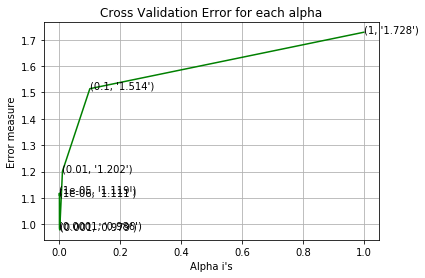

For values of best alpha =  0.001 The train log loss is: 0.5921387706702012
For values of best alpha =  0.001 The cross validation log loss is: 0.9791787593066636
For values of best alpha =  0.001 The test log loss is: 1.0005060885684953


In [276]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 0.9791787593066636
Number of mis-classified points : 0.3295668549905838
-------------------- Confusion matrix --------------------


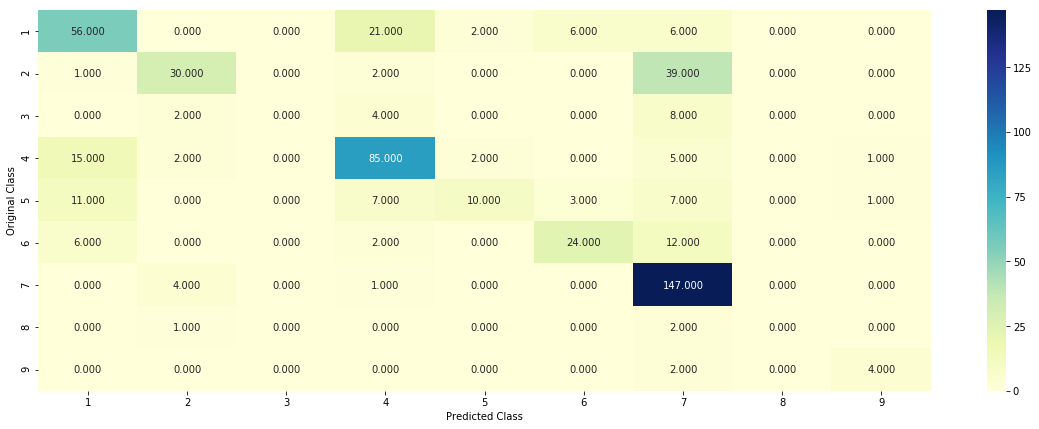

-------------------- Precision matrix (Columm Sum=1) --------------------


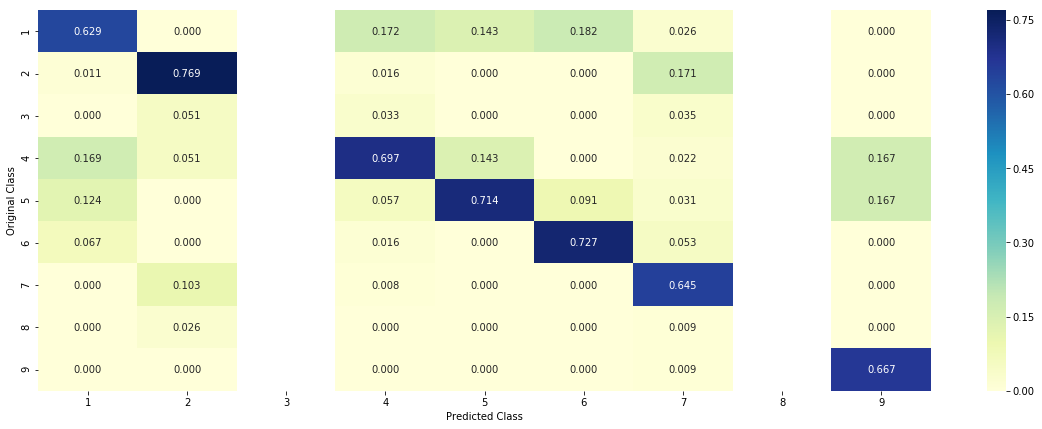

-------------------- Recall matrix (Row sum=1) --------------------


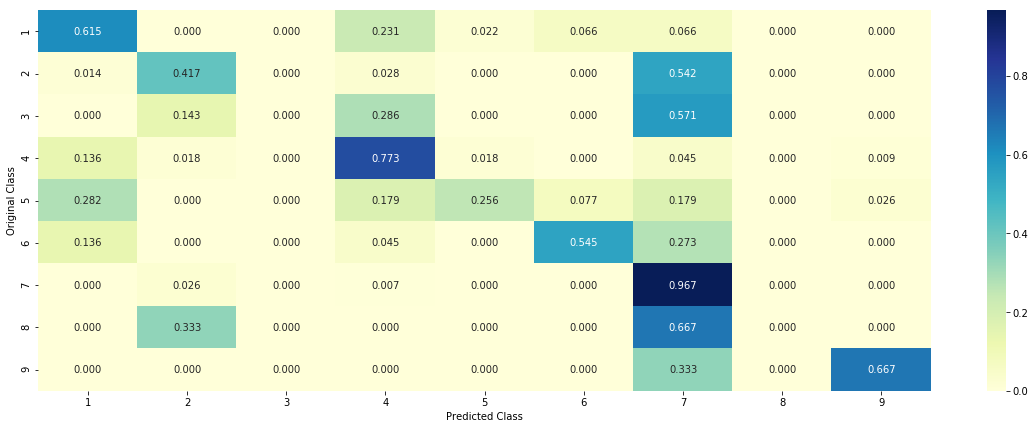

In [277]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [278]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 32
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[1.510e-02 3.788e-01 8.000e-04 2.060e-02 5.600e-03 9.200e-03 5.642e-01
  5.300e-03 4.000e-04]]
Actual Class : 7
--------------------------------------------------
2 Text feature [fractions] present in test data point [True]
12 Text feature [lines] present in test data point [True]
14 Text feature [helix] present in test data point [True]
18 Text feature [32] present in test data point [True]
20 Text feature [cancer] present in test data point [True]
29 Text feature [cells] present in test data point [True]
30 Text feature [harbored] present in test data point [True]
31 Text feature [unable] present in test data point [True]
40 Text feature [36] present in test data point [True]
52 Text feature [inactive] present in test data point [True]
56 Text feature [fbs] present in test data point [True]
59 Text feature [treatments] present in test data point [True]
65 Text feature [partial] present in test data point [True]
67 Text feature [high

<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [281]:
test_point_index = 18
no_feature = 120
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.032  0.1026 0.0181 0.6899 0.0747 0.0165 0.0564 0.0067 0.0032]]
Actual Class : 2
--------------------------------------------------
12 Text feature [found] present in test data point [True]
14 Text feature [ca] present in test data point [True]
34 Text feature [pair] present in test data point [True]
48 Text feature [cultured] present in test data point [True]
49 Text feature [appears] present in test data point [True]
50 Text feature [4b] present in test data point [True]
58 Text feature [exon] present in test data point [True]
80 Text feature [lead] present in test data point [True]
83 Text feature [hematopoietic] present in test data point [True]
87 Text feature [wt] present in test data point [True]
108 Text feature [12] present in test data point [True]
117 Text feature [yet] present in test data point [True]
Out of the top  120  features  12 are present in query point


# Bow Featurization on LogisticRegression

## Hyper paramter tuning With Class balancing

for alpha = 1e-06
Log Loss : 1.1427459415875887
for alpha = 1e-05
Log Loss : 1.1123202025537082
for alpha = 0.0001
Log Loss : 0.9681333224194325
for alpha = 0.001
Log Loss : 0.9659124276640042
for alpha = 0.01
Log Loss : 1.1553608973702012
for alpha = 0.1
Log Loss : 1.6282481551489696
for alpha = 1
Log Loss : 1.7969629981922497
for alpha = 10
Log Loss : 1.8116849343799444
for alpha = 100
Log Loss : 1.813163793226277


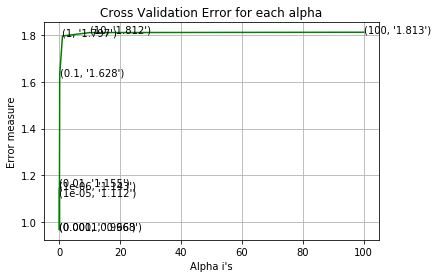

For values of best alpha =  0.001 The train log loss is: 0.5968579499172576
For values of best alpha =  0.001 The cross validation log loss is: 0.9659124276640042
For values of best alpha =  0.001 The test log loss is: 0.981602220415944


In [282]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding_LR, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding_LR, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_LR)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_LR, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_LR, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding_LR)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding_LR)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding_LR)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

### Testing the model with best hyper paramters

Log loss : 0.9659124276640042
Number of mis-classified points : 0.3446327683615819
-------------------- Confusion matrix --------------------


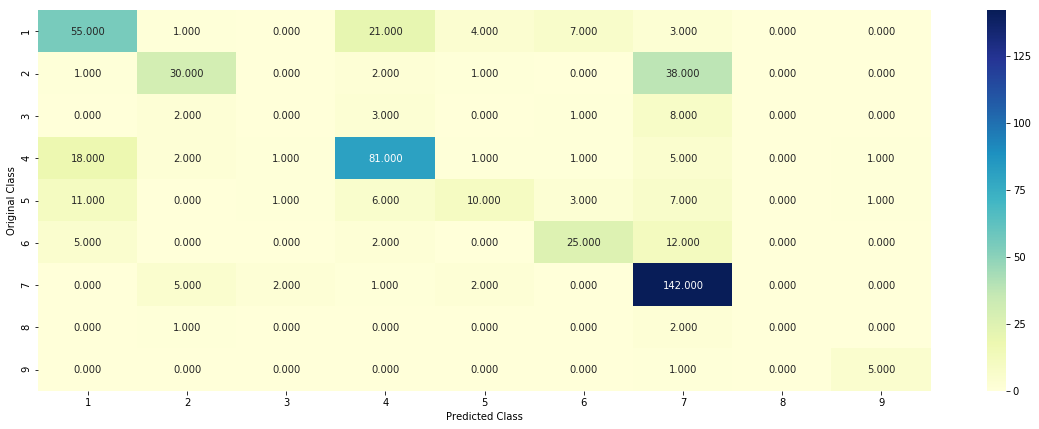

-------------------- Precision matrix (Columm Sum=1) --------------------


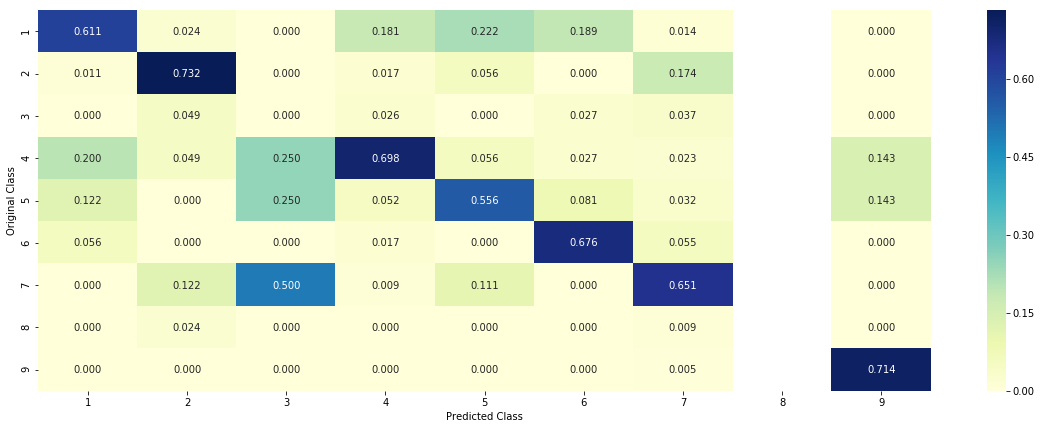

-------------------- Recall matrix (Row sum=1) --------------------


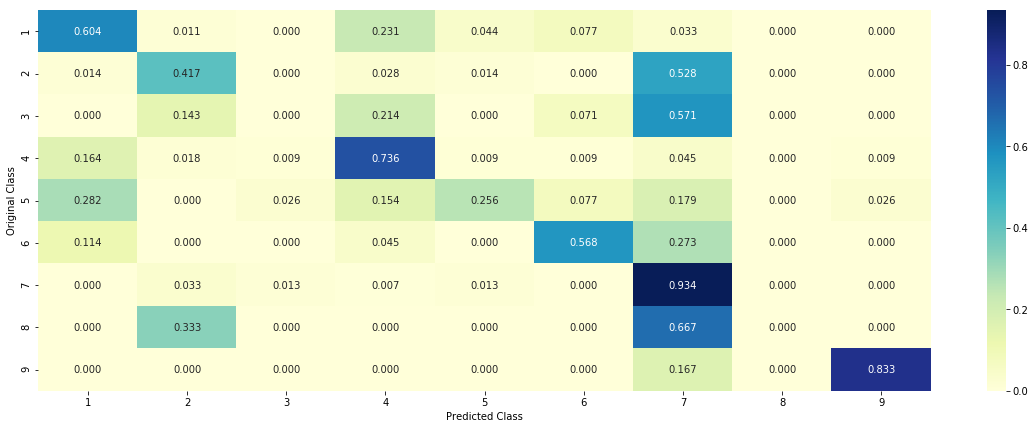

In [283]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding_LR, train_y, cv_x_onehotCoding_LR, cv_y, clf)

### Correctly Classified point

In [284]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_LR,train_y)
test_point_index = 5
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding_LR[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding_LR[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[8.630e-02 1.900e-03 0.000e+00 8.668e-01 7.000e-04 1.200e-03 4.020e-02
  2.800e-03 1.000e-04]]
Actual Class : 4
--------------------------------------------------
0 Text feature [helices] present in test data point [True]
10 Text feature [found] present in test data point [True]
17 Text feature [ca] present in test data point [True]
18 Text feature [absence] present in test data point [True]
20 Text feature [accumulation] present in test data point [True]
36 Text feature [driver] present in test data point [True]
39 Text feature [pair] present in test data point [True]
44 Text feature [cultured] present in test data point [True]
47 Text feature [42] present in test data point [True]
52 Text feature [4b] present in test data point [True]
53 Text feature [appears] present in test data point [True]
54 Text feature [approach] present in test data point [True]
55 Text feature [hela] present in test data point [True]
61 Text feature [fbw7] 

### Incorrectly Classified point

In [286]:
test_point_index = 4
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding_LR[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding_LR[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[5.700e-03 2.670e-02 1.300e-03 1.520e-02 7.000e-03 1.120e-02 9.291e-01
  3.300e-03 4.000e-04]]
Actual Class : 2
--------------------------------------------------
3 Text feature [activate] present in test data point [True]
12 Text feature [helix] present in test data point [True]
15 Text feature [cancer] present in test data point [True]
16 Text feature [lines] present in test data point [True]
20 Text feature [32] present in test data point [True]
28 Text feature [mitogen] present in test data point [True]
33 Text feature [ac] present in test data point [True]
36 Text feature [uk] present in test data point [True]
37 Text feature [able] present in test data point [True]
40 Text feature [cells] present in test data point [True]
82 Text feature [50] present in test data point [True]
83 Text feature [taken] present in test data point [True]
90 Text feature [hcl] present in test data point [True]
92 Text feature [association] present in 

## Without Class balancing

for alpha = 1e-06
Log Loss : 1.1053180824752908
for alpha = 1e-05
Log Loss : 1.1146169470917229
for alpha = 0.0001
Log Loss : 0.9900465593031316
for alpha = 0.001
Log Loss : 0.9824443327134725
for alpha = 0.01
Log Loss : 1.2020671420237072
for alpha = 0.1
Log Loss : 1.5093463960802402
for alpha = 1
Log Loss : 1.7200534937215044


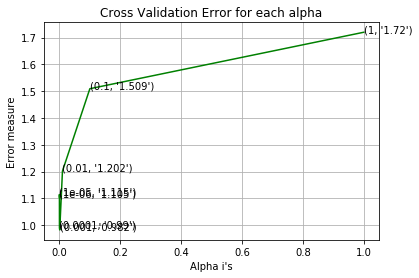

For values of best alpha =  0.001 The train log loss is: 0.5908859664675038
For values of best alpha =  0.001 The cross validation log loss is: 0.9824443327134725
For values of best alpha =  0.001 The test log loss is: 1.0039627753279916


In [287]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding_LR, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding_LR, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_LR)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_LR, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_LR, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding_LR)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding_LR)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding_LR)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

### Testing model with best hyper parameters

Log loss : 0.9824443327134725
Number of mis-classified points : 0.327683615819209
-------------------- Confusion matrix --------------------


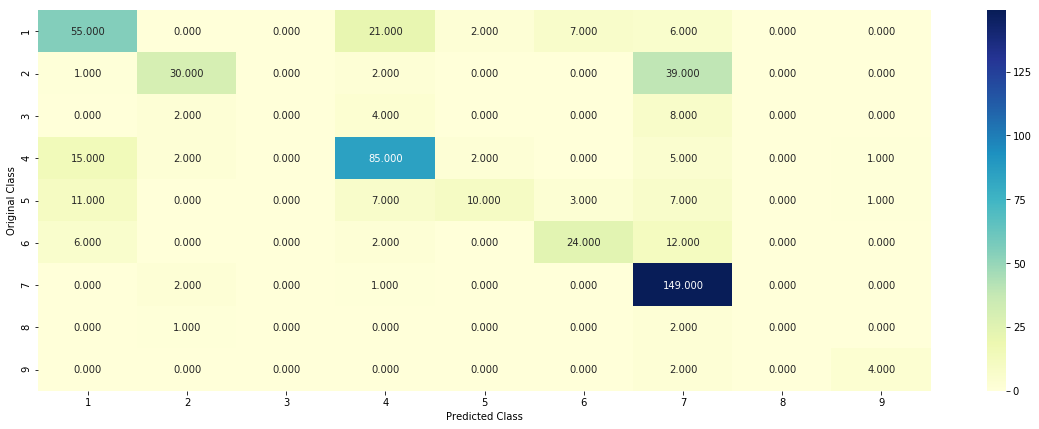

-------------------- Precision matrix (Columm Sum=1) --------------------


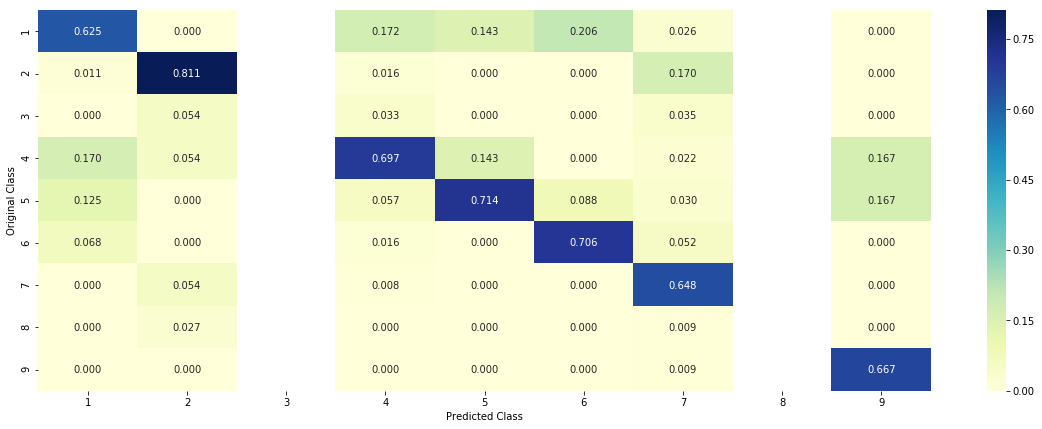

-------------------- Recall matrix (Row sum=1) --------------------


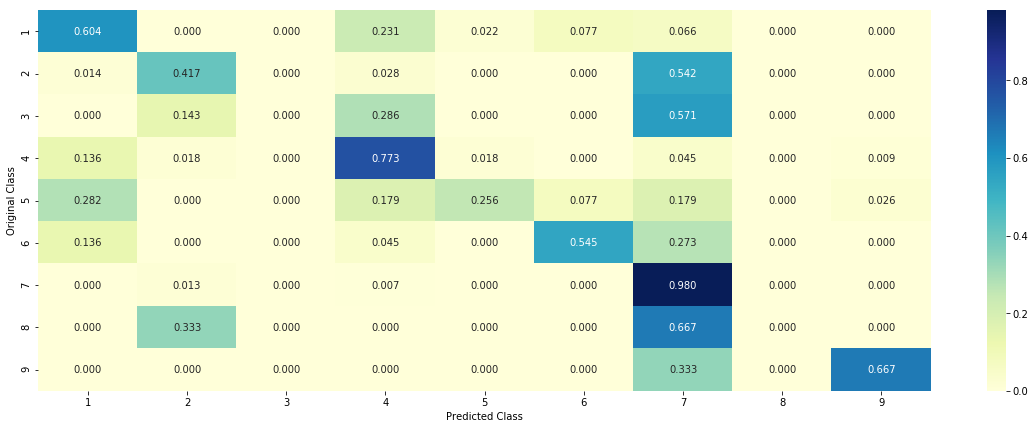

In [288]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding_LR, train_y, cv_x_onehotCoding_LR, cv_y, clf)

### Correctly Classified point

In [289]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_LR,train_y)
test_point_index = 5
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding_LR[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding_LR[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[1.112e-01 1.700e-03 0.000e+00 8.474e-01 5.000e-04 8.000e-04 3.470e-02
  3.700e-03 0.000e+00]]
Actual Class : 4
--------------------------------------------------
0 Text feature [helices] present in test data point [True]
11 Text feature [found] present in test data point [True]
14 Text feature [ca] present in test data point [True]
18 Text feature [absence] present in test data point [True]
21 Text feature [accumulation] present in test data point [True]
33 Text feature [pair] present in test data point [True]
38 Text feature [42] present in test data point [True]
41 Text feature [driver] present in test data point [True]
48 Text feature [cultured] present in test data point [True]
49 Text feature [appears] present in test data point [True]
50 Text feature [4b] present in test data point [True]
52 Text feature [approach] present in test data point [True]
61 Text feature [fbw7] present in test data point [True]
63 Text feature [hela] 

### Incorrectly Classified point

In [290]:
test_point_index = 4
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding_LR[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding_LR[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[5.400e-03 2.730e-02 1.400e-03 1.240e-02 6.600e-03 9.900e-03 9.326e-01
  4.200e-03 2.000e-04]]
Actual Class : 2
--------------------------------------------------
4 Text feature [activate] present in test data point [True]
12 Text feature [lines] present in test data point [True]
13 Text feature [helix] present in test data point [True]
18 Text feature [32] present in test data point [True]
20 Text feature [cancer] present in test data point [True]
22 Text feature [mitogen] present in test data point [True]
29 Text feature [cells] present in test data point [True]
46 Text feature [able] present in test data point [True]
51 Text feature [32p] present in test data point [True]
52 Text feature [inactive] present in test data point [True]
58 Text feature [hcl] present in test data point [True]
63 Text feature [uk] present in test data point [True]
67 Text feature [higher] present in test data point [True]
74 Text feature [buffer] present 

<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-05
Log Loss : 1.0883819930357332
for C = 0.0001
Log Loss : 1.0722789337828402
for C = 0.001
Log Loss : 1.0020302156769665
for C = 0.01
Log Loss : 1.1380185122872661
for C = 0.1
Log Loss : 1.664901554055184
for C = 1
Log Loss : 1.8158676726272203
for C = 10
Log Loss : 1.8159618939020719
for C = 100
Log Loss : 1.8159620513471164


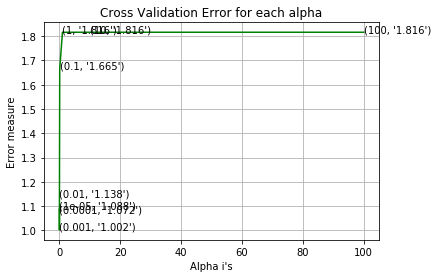

For values of best alpha =  0.001 The train log loss is: 0.4817202765055301
For values of best alpha =  0.001 The cross validation log loss is: 1.0020302156769665
For values of best alpha =  0.001 The test log loss is: 1.0287254277493354


In [291]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.0020302156769665
Number of mis-classified points : 0.3295668549905838
-------------------- Confusion matrix --------------------


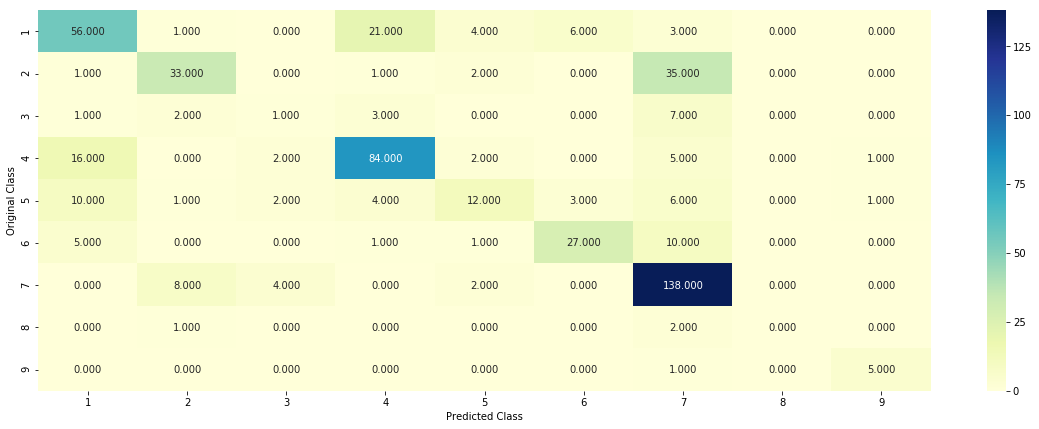

-------------------- Precision matrix (Columm Sum=1) --------------------


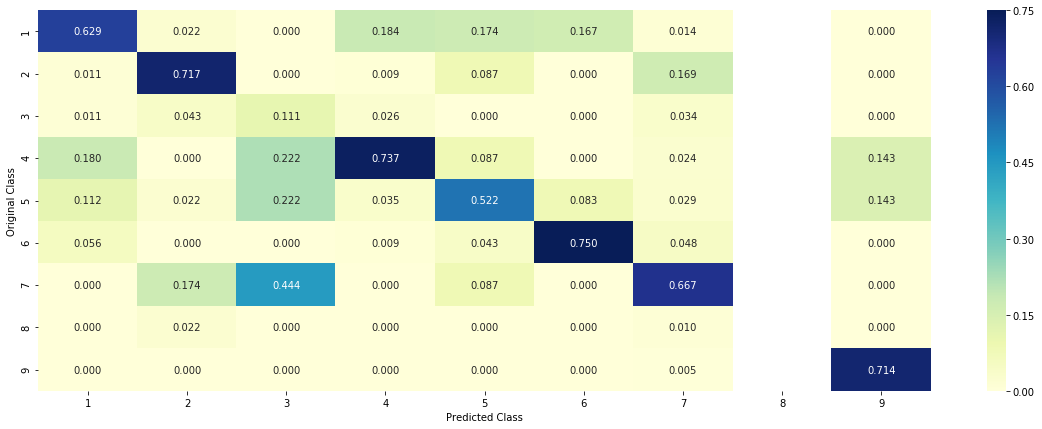

-------------------- Recall matrix (Row sum=1) --------------------


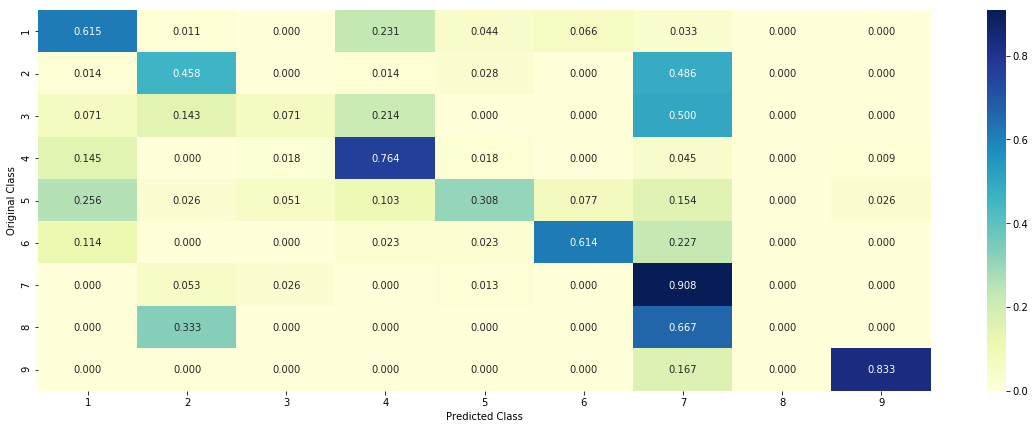

In [292]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [293]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 119
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0786 0.1023 0.0537 0.0907 0.075  0.0548 0.5233 0.0078 0.0137]]
Actual Class : 7
--------------------------------------------------
4 Text feature [activate] present in test data point [True]
60 Text feature [mass] present in test data point [True]
84 Text feature [pik3ca] present in test data point [True]
91 Text feature [identified] present in test data point [True]
101 Text feature [1997] present in test data point [True]
103 Text feature [could] present in test data point [True]
106 Text feature [cancer] present in test data point [True]
196 Text feature [five] present in test data point [True]
217 Text feature [domain] present in test data point [True]
257 Text feature [figure] present in test data point [True]
313 Text feature [mechanism] present in test data point [True]
319 Text feature [however] present in test data point [True]
399 Text feature [candidate] present in test data point [True]
429 Text feature [taken] present 

<h4>4.3.3.2. For Incorrectly classified point</h4>

In [294]:
test_point_index = 4
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0239 0.0371 0.0034 0.0413 0.0153 0.0074 0.8672 0.0033 0.0012]]
Actual Class : 2
--------------------------------------------------
4 Text feature [activate] present in test data point [True]
14 Text feature [32] present in test data point [True]
17 Text feature [lines] present in test data point [True]
20 Text feature [mitogen] present in test data point [True]
30 Text feature [feature] present in test data point [True]
31 Text feature [patient] present in test data point [True]
35 Text feature [loss] present in test data point [True]
39 Text feature [distinct] present in test data point [True]
46 Text feature [conclusion] present in test data point [True]
50 Text feature [membrane] present in test data point [True]
54 Text feature [inactive] present in test data point [True]
68 Text feature [2010] present in test data point [True]
73 Text feature [oncogenic] present in test data point [True]
75 Text feature [40] present in test da

<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

for n_estimators = 100 and max depth =  5
Log Loss : 1.1632927388302177
for n_estimators = 100 and max depth =  10
Log Loss : 1.1767257719476805
for n_estimators = 200 and max depth =  5
Log Loss : 1.1523102508421286
for n_estimators = 200 and max depth =  10
Log Loss : 1.1625723767171394
for n_estimators = 500 and max depth =  5
Log Loss : 1.150091112079261
for n_estimators = 500 and max depth =  10
Log Loss : 1.156775571562377
for n_estimators = 1000 and max depth =  5
Log Loss : 1.1495288888185642
for n_estimators = 1000 and max depth =  10
Log Loss : 1.158151085419217
for n_estimators = 2000 and max depth =  5
Log Loss : 1.1498863443618237
for n_estimators = 2000 and max depth =  10
Log Loss : 1.1563595008898253


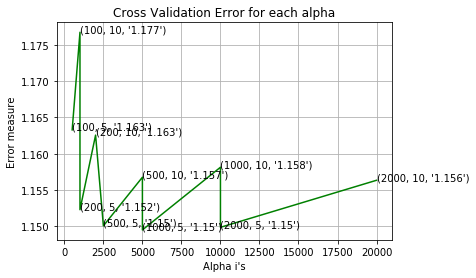

For values of best estimator =  1000 The train log loss is: 0.9216402408019874
For values of best estimator =  1000 The cross validation log loss is: 1.1495288888185642
For values of best estimator =  1000 The test log loss is: 1.1763159746949827


In [295]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.1495288888185642
Number of mis-classified points : 0.3822975517890772
-------------------- Confusion matrix --------------------


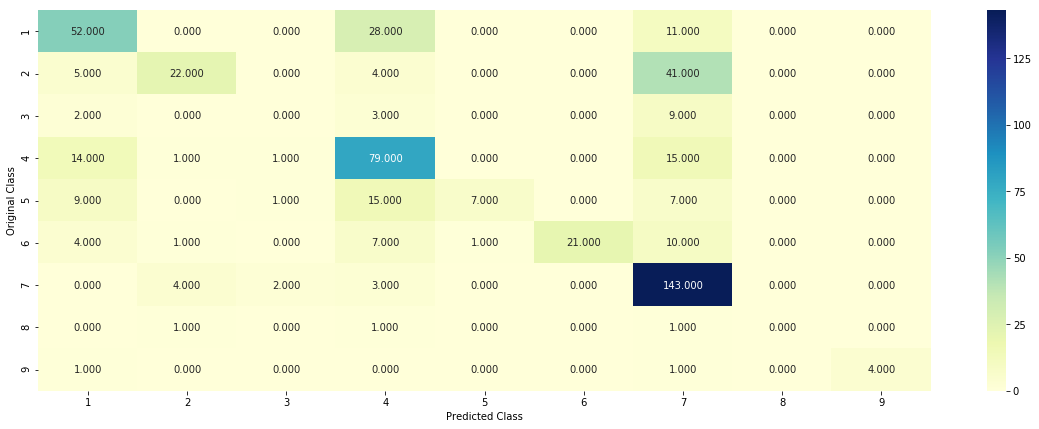

-------------------- Precision matrix (Columm Sum=1) --------------------


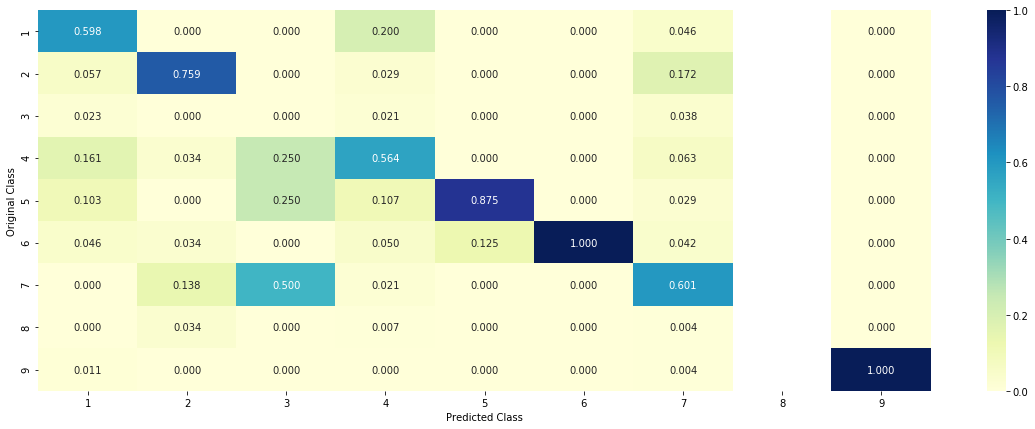

-------------------- Recall matrix (Row sum=1) --------------------


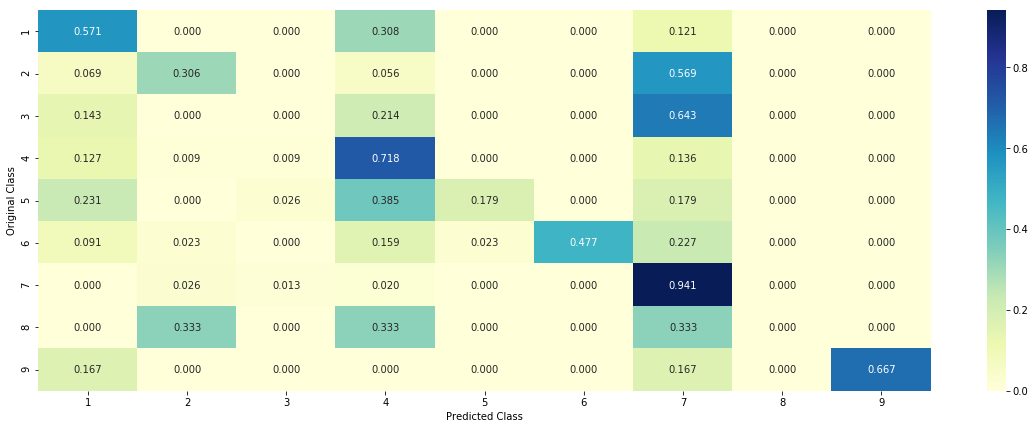

In [296]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [301]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 65
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0]) 
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0545 0.1102 0.0056 0.0493 0.0337 0.032  0.6839 0.0071 0.0235]]
Actual Class : 7
--------------------------------------------------
1 Text feature [require] present in test data point [True]
5 Text feature [represents] present in test data point [True]
9 Text feature [required] present in test data point [True]
14 Text feature [uk] present in test data point [True]
34 Text feature [strategies] present in test data point [True]
38 Text feature [subcellular] present in test data point [True]
42 Text feature [trans] present in test data point [True]
52 Text feature [nevertheless] present in test data point [True]
53 Text feature [strongly] present in test data point [True]
60 Text feature [structurally] present in test data point [True]
63 Text feature [reveal] present in test data point [True]
66 Text feature [pten] present in test data point [True]
67 Text feature [structure] present in test data point [True]
74 Text feature [tables]

<h4>4.5.3.2. Inorrectly Classified point</h4>

In [302]:
test_point_index = 11
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.2093 0.1508 0.0222 0.1675 0.0643 0.06   0.3046 0.0093 0.0121]]
Actual Class : 4
--------------------------------------------------
1 Text feature [require] present in test data point [True]
9 Text feature [required] present in test data point [True]
34 Text feature [strategies] present in test data point [True]
53 Text feature [strongly] present in test data point [True]
95 Text feature [stress] present in test data point [True]
Out of the top  100  features  5 are present in query point


<h3>4.5.3. Hyper paramter tuning (With Response Coding)</h3>

In [303]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
'''
fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/4)],max_depth[int(i%4)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 2.6467260884121213
for n_estimators = 10 and max depth =  3
Log Loss : 2.4029026420514463
for n_estimators = 10 and max depth =  5
Log Loss : 2.27040815175476
for n_estimators = 10 and max depth =  10
Log Loss : 2.6917981155350805
for n_estimators = 50 and max depth =  2
Log Loss : 2.4230049154469424
for n_estimators = 50 and max depth =  3
Log Loss : 2.3145110622507152
for n_estimators = 50 and max depth =  5
Log Loss : 2.2076028024433922
for n_estimators = 50 and max depth =  10
Log Loss : 2.4454612796171435
for n_estimators = 100 and max depth =  2
Log Loss : 2.669186259268122
for n_estimators = 100 and max depth =  3
Log Loss : 2.521887296288855
for n_estimators = 100 and max depth =  5
Log Loss : 2.1261703795836993
for n_estimators = 100 and max depth =  10
Log Loss : 2.4063637514164093
for n_estimators = 200 and max depth =  2
Log Loss : 2.4908178394737783
for n_estimators = 200 and max depth =  3
Log Loss : 2.5530209485884674
f

<h3>4.5.4. Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 2.1261703795836993
Number of mis-classified points : 0.7796610169491526
-------------------- Confusion matrix --------------------


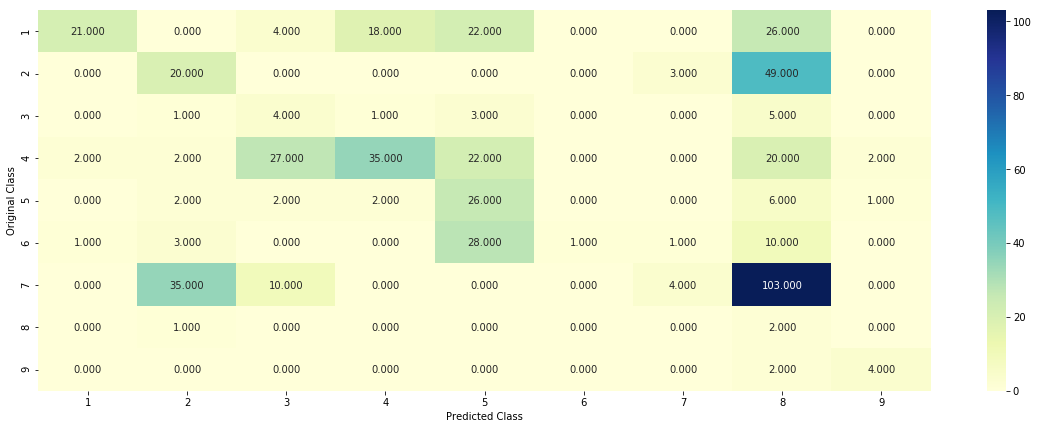

-------------------- Precision matrix (Columm Sum=1) --------------------


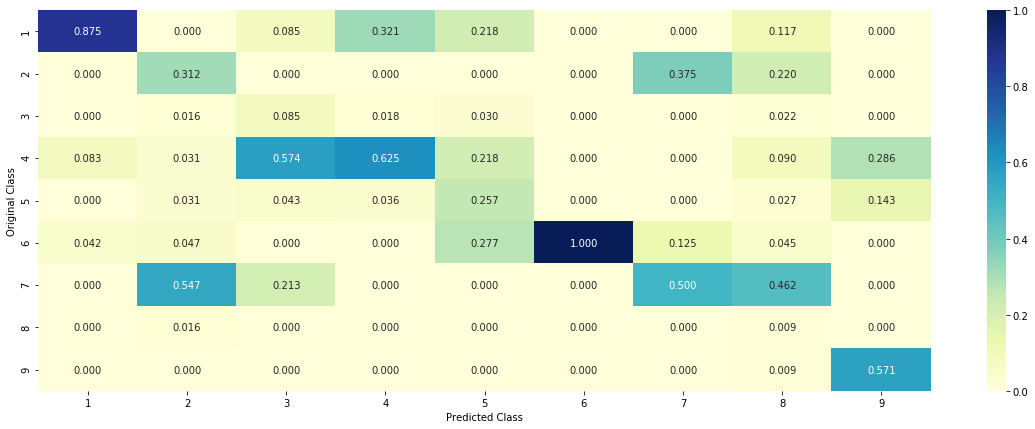

-------------------- Recall matrix (Row sum=1) --------------------


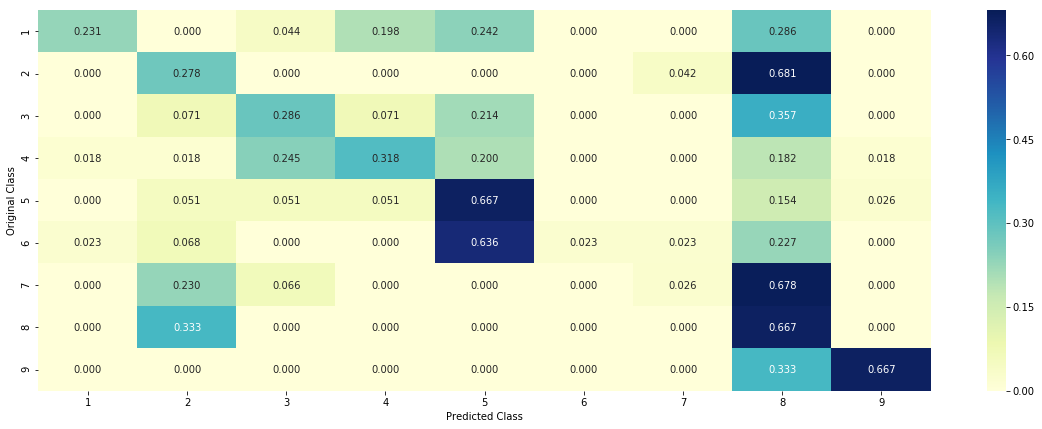

In [304]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [305]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


test_point_index = 5
no_feature = 27
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 4
Predicted Class Probabilities: [[0.0916 0.0322 0.1778 0.1787 0.1189 0.1158 0.0214 0.142  0.1217]]
Actual Class : 4
--------------------------------------------------
Text is important feature
Text is important feature
Variation is important feature
Text is important feature
Variation is important feature
Variation is important feature
Text is important feature
Variation is important feature
Text is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Variation is important feature
Text is important feature
Gene is important feature
Gene is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Text is important feature
Variation is important feature
Text is important feature
Variation is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is importa

<h4>4.5.5.2. Incorrectly Classified point</h4>

In [306]:
test_point_index = 100
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 8
Predicted Class Probabilities: [[0.0144 0.2298 0.0631 0.0149 0.0458 0.0857 0.0236 0.4916 0.0312]]
Actual Class : 5
--------------------------------------------------
Text is important feature
Text is important feature
Variation is important feature
Text is important feature
Variation is important feature
Variation is important feature
Text is important feature
Variation is important feature
Text is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Variation is important feature
Text is important feature
Gene is important feature
Gene is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Text is important feature
Variation is important feature
Text is important feature
Variation is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is importa

<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [307]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 0.95
Support vector machines : Log Loss: 1.82
Naive Bayes : Log Loss: 1.19
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.177
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.029
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.477
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.040
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.145
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.517


<h3>4.7.2 testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.5698182500901117
Log loss (CV) on the stacking classifier : 1.040382921824722
Log loss (test) on the stacking classifier : 1.1052471772744539
Number of missclassified point : 0.3614457831325301
-------------------- Confusion matrix --------------------


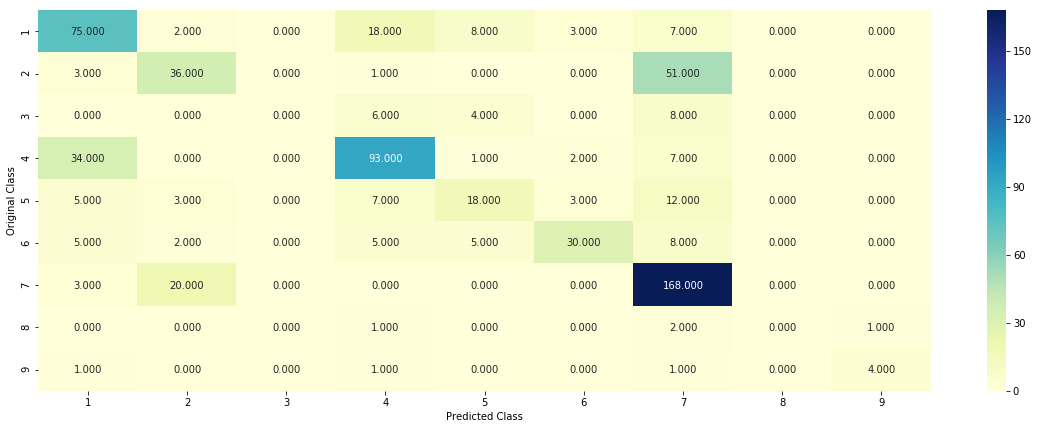

-------------------- Precision matrix (Columm Sum=1) --------------------


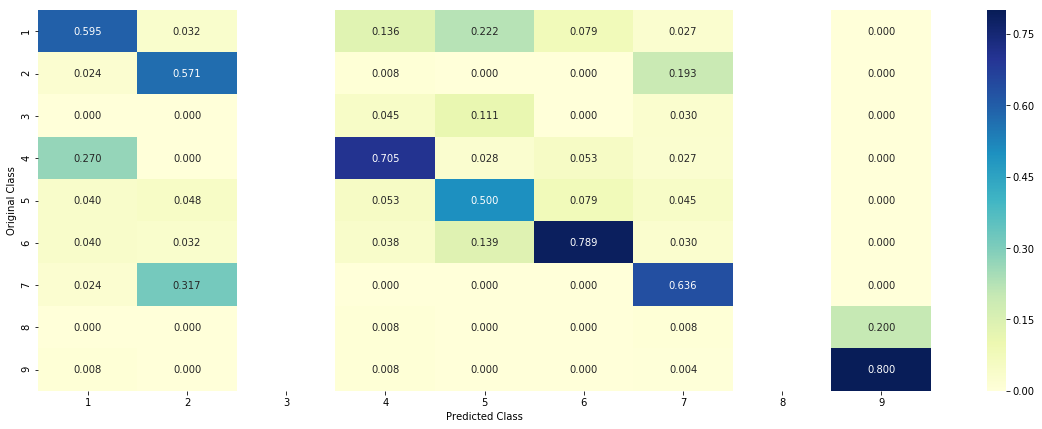

-------------------- Recall matrix (Row sum=1) --------------------


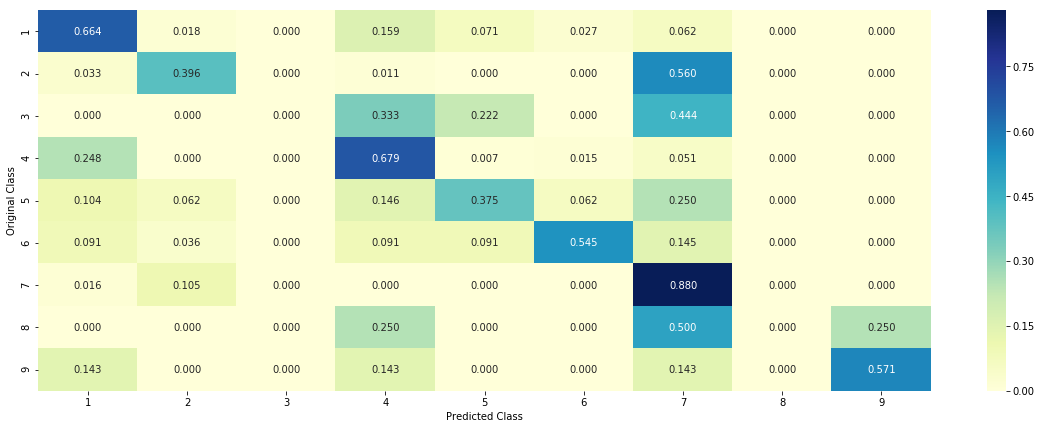

In [308]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.8592774650269929
Log loss (CV) on the VotingClassifier : 1.1684131444371721
Log loss (test) on the VotingClassifier : 1.194235432533073
Number of missclassified point : 0.35843373493975905
-------------------- Confusion matrix --------------------


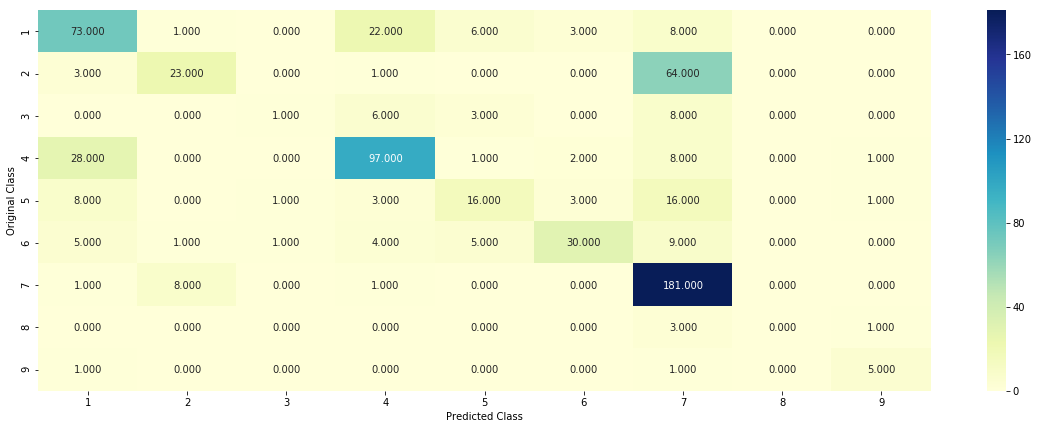

-------------------- Precision matrix (Columm Sum=1) --------------------


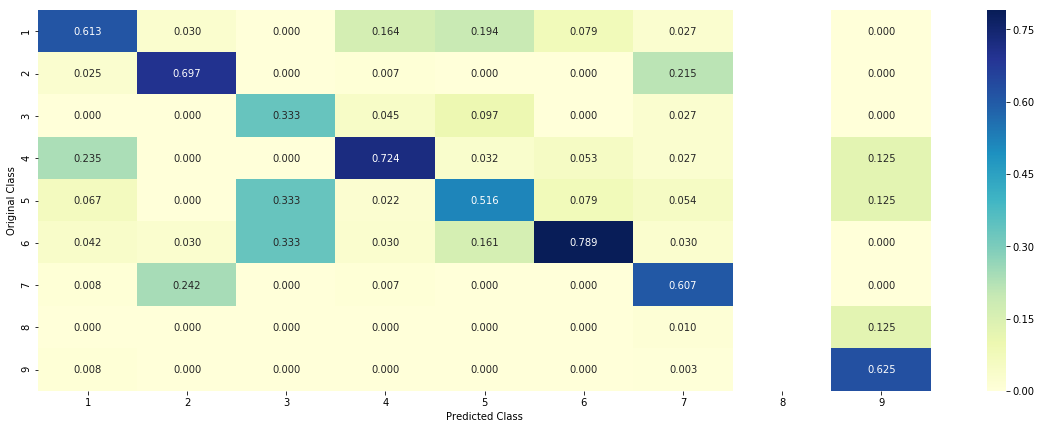

-------------------- Recall matrix (Row sum=1) --------------------


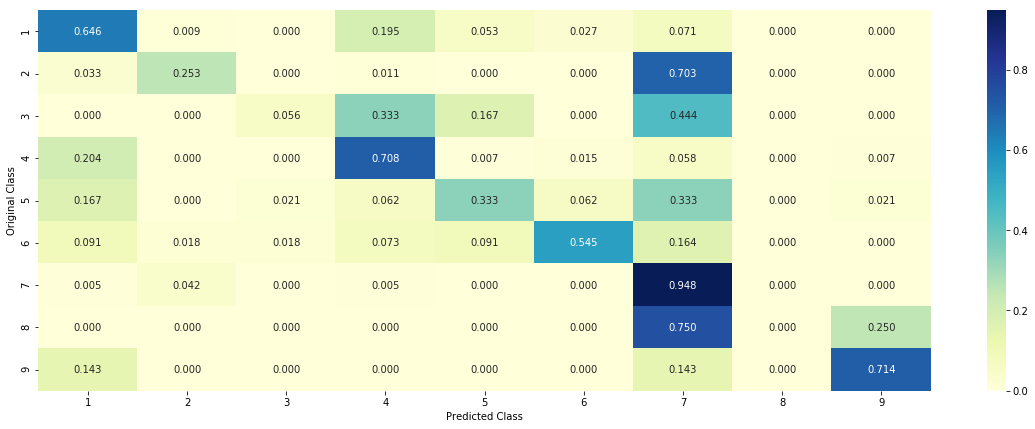

In [309]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding))

### Conclusions <br>
1. Introduced feature engineering and applied different-different model on bow and tfidf featurization technique with unigram and bigram.
2. Took only top 3k features for both bow and tfidf representation.
3. We did hyperparameter tuning to get best parameter and reduce the log loss.
4. It is observed that when we used logistic regression on tfidf we got log-loss less than 1 which is what we wanted.
5. None of the model obtained log-loss less then 1 except LR.

### Procedure that are followed to solve this problem
1. We have loaded/readed the data into pandas dataframe 
2. Found that some special char, multiple space b/w words so used text preprocessing/data cleaning
3. Did EDA for better understanding of data and found that some insights out of it although It is medical data and for better understanding of data we need to have some good knowledge in molecular biology or to be more specific domain knowledge. 
4. Extracted some feature out of text data as well as from the others features(Gene, Variation) also and did some visualization to understand whether it has some value or not.
5. We have also checked for distribution of the class labels among train,test, and validation data.
6. After this, built a random model and generated 9 class probability randomely such that they sum to 1 to ensure that whatever model we built on top of this the loss will be always less and got log-loss ~2.5 from this random model.
7. Featurize categorical feature into numerical using onehotencoding and response coding and used both featurized vector to predict class label.
8. We also build other models with each and every individual engineered feature and check for whether they will be helpful or not in prediction and found that they are helpful.
9. On the text features we have used bow and tfidf and choose top 3k features and then stacked all the features on top of each other.
10. Now it's time to build model but before we built, first tuned the hyperparameter and then started with baseline model naive bays and obtained train loss ~ 0.9, test loss ~1.15 and validataion loss ~1.9.
11. And then again tuned hyperparameter for nearest neighbor and got slightly better or same accurcy than naive bays.
12. We tried naive bayes, nearest neighbor, logistic regression, linear SVM, random forest, stack 3 models(logistic regression, linear svm, naive bayes) and then used voting model and for each and every model did hyperparameter tuning, showed % of missclassified point, showed confusion matrix, precision, recall in a heatmap and the most important given interpretation(i.e. why the given gene and mutation comes under class 4 or whatever) for each model.

In [315]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["MODEL", "Featurization Technique", "TRAIN_LOSS", "VAL_LOSS", "TEST_LOSS"]
x.add_row(["Naive Bayes","OnehotEncoding",0.69 , 1.15, 1.24])
x.add_row(["KNN","ResponseCoding",0.94,1.08,1.13])
x.add_row(["LogisticRegression with class balancing","OnehotEncoding",0.59,0.96,0.98])
x.add_row(["LogisticRegression without class balancing","OnehotEncoding",0.59,0.98,1.0])
x.add_row(["LogisticRegression with Countvec class balancing","OnehotEncoding",0.59,0.96,0.98])
x.add_row(["LogisticRegression with Countvec and without class balancing","OnehotEncoding",0.59,0.96,1.0])
x.add_row(["Liner SVM","OnehotEncoding",0.48,1.00,1.02])
x.add_row(["Random Forest","OnehotEncoding", 0.92,1.14,1.17])
x.add_row(["Random Forest","Responsecoding", 0.02,2.12,2.08])
x.add_row(["Stacking of models","Onehotencoding", 0.95,1.82 ,1.19])
x.add_row(["Maximum Voting classifier","Onehotencoding", 0.85,1.16,1.19])

print(x)

+--------------------------------------------------------------+-------------------------+------------+----------+-----------+
|                            MODEL                             | Featurization Technique | TRAIN_LOSS | VAL_LOSS | TEST_LOSS |
+--------------------------------------------------------------+-------------------------+------------+----------+-----------+
|                         Naive Bayes                          |      OnehotEncoding     |    0.69    |   1.15   |    1.24   |
|                             KNN                              |      ResponseCoding     |    0.94    |   1.08   |    1.13   |
|           LogisticRegression with class balancing            |      OnehotEncoding     |    0.59    |   0.96   |    0.98   |
|          LogisticRegression without class balancing          |      OnehotEncoding     |    0.59    |   0.98   |    1.0    |
|       LogisticRegression with Countvec class balancing       |      OnehotEncoding     |    0.59    |   0.96 